# Exploratory Data Analysis - Bank Loan Risk Analytics

### Table of Contents:
1. Business Problem
2. Analyis Objectives
3. Import the libraries.
4. Data Understanding.
    - 4.1. Load the dataset
    - 4.2 Data description.
5. Data Cleaning and Handling
    - 5.1 Drop columns containing many missing values
    - 5.2 Drop unimportance columns
    - 5.3 Data Profiling before processing
    - 5.4 Handling missing values
    - 5.5 Identifying outliers
    - 5.6 Standardlising values
6. Exploratory Data Analysis
    - 6.1 Univariate and bivariate analysis
        - 6.1.1 Categorical Variables
        - 6.1.2 Numerical Variables
        - 6.1.2 Merged Dataset.
    - 6.2 Correlation and Multivariate analysis
        - 6.2.1 Categorical Variables
        - 6.2.2 Numerical Variables
7. Conclusion and Suggestion

### 1. Business Problem:
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### 2. Analyis Objectives:
- EDA the dataset to analysis the patterns in the data, so that ensure the applicants capable of repaying the loan are not rejected.

## 3. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', None)         
pd.set_option('display.max_columns', None)       

import warnings
warnings.filterwarnings('ignore')                  

## 4. Data Understanding

### 4.1 Load the dataset
- Application file contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
- Previous_application file contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [2]:
#read all csv files
application = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')

In [3]:
#print the head values of dataset
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#print the head values of dataset
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Description of dataset

In [5]:
#check the number of rows and columns of Application dataset
application.shape

(307511, 122)

In [6]:
#check the number of rows and columns of Application dataset
previous_application.shape

(1670214, 37)

In [7]:
#check data type of each column.
application.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
#check data type of each column.
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Application dataset: 
- There are **122 columns and 307511 rows** in the dataframe which contains 65 columns with float64 datatype, 41 columns with int64 data type, and 16 columns with object data type
#### Previous datasheet:
- There are **37 columns and  1670214 rows** in the dataframe. 

The detail description of each columns is explained in the columns_description dataset

## 5. Data Cleanning and Handling
Because there are a lot of columns in the application dataset, we are going to run the analysis for the appropriate columns. To find out which columns are not appropriate, let's check missing values for some columns and remove those where the percentage of missing values is higher or equal to 40%. Also, we can check which columns are not affect to the analysis.

### 5.1 Drop columns containing many missing values

In [9]:
#check the percentage of missing values in application dataset
missing_values_1 = pd.DataFrame((application.isnull().sum() / len(application))*100)
missing_values_1 = missing_values_1[missing_values_1.values >= 40]
missing_values_1

,0
OWN_CAR_AGE,65.990810
EXT_SOURCE_1,56.381073
APARTMENTS_AVG,50.749729
BASEMENTAREA_AVG,58.515956
YEARS_BEGINEXPLUATATION_AVG,48.781019
YEARS_BUILD_AVG,66.497784
COMMONAREA_AVG,69.872297
ELEVATORS_AVG,53.295980
ENTRANCES_AVG,50.348768
FLOORSMAX_AVG,49.760822


In [10]:
#check the percentage of missing values in previous application dataset
missing_values_2 = pd.DataFrame((previous_application.isnull().sum() / len(previous_application))*100)
missing_values_2 = missing_values_2[missing_values_2.values >= 40]
missing_values_2

,0
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698
NAME_TYPE_SUITE,49.119754
DAYS_FIRST_DRAWING,40.298129
DAYS_FIRST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_LAST_DUE,40.298129
DAYS_TERMINATION,40.298129


Upon computing the percentage of missing values for each column, it has become evident that several columns exhibit a substantial amount of missing data. As such, to refine our dataset to only include the data we need, we are going to drop these columns because restoring missing values may not be possible or lead to incorrect results.

In [11]:
#drop all columns in missing_values_1
missing_cols_1 = [x for x in missing_values_1.index if x in application.columns]
application.drop(columns=missing_cols_1, inplace=True)

In [12]:
#drop all columns in missing_values_2
missing_cols_2 = [x for x in missing_values_2.index if x in previous_application.columns]
previous_application.drop(columns=missing_cols_2, inplace=True)

In [13]:
application.shape

(307511, 73)

In [14]:
previous_application.shape

(1670214, 26)

- In the application dataset, we still have **73 columns and 307511 rows**
- In the previous application, we still have **26 columns and 1670214 rows**

### 5.2 Drop unimportance columns

Following the description of columns, we see that there are many columns, but this doesn't affect the analysis because it just flags the process statement of applications.

In [15]:
#print the flag_document columns
flag_document_col = [x for x in application.columns if 'FLAG_DOCUMENT' in x]
application.drop(columns=flag_document_col, inplace=True)

In [16]:
#recheck all columns of application
application.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [17]:
#recheck all columns of previous application
previous_application.keys()

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

As we can see, most of the normalized columns have been dropped from the dataset, but there are some normalized columns in there. We will remove these columns because they are no longer necessary. 

In [18]:
#drop these columns as correlation score is very low
application.drop(columns= ['EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE'], inplace= True)

### 5.3 Data Profiling before processing

After removing all unneccesary data, we are going to apply pandas profiling to take a look and gain more insights of dataset.

In [19]:
from pandas_profiling import ProfileReport

In [20]:
#apply pandas-profiling for application dataset and save as html file.
pandas_profile = ProfileReport(df= application, minimal= True, progress_bar=False)
pandas_profile.to_file(output_file = 'application profilfing.html')

In [21]:
#apply pandas-profiling for application dataset and save as html file.
pandas_profile_1 = ProfileReport(df= previous_application, minimal= True, progress_bar=False)
pandas_profile_1.to_file(output_file = 'previous_application profilfing.html')

**Observations from the Application profiling:**
- **ORGANIZATION_TYPE** has a high cardinality: **58 distinct values**
- **NAME_CONTRACT_TYPE** is highly imbalanced **(54.6%)**
- **NAME_TYPE_SUITE** is highly imbalanced **(66.1%)**
- **NAME_EDUCATION_TYPE** is highly imbalanced **(52.8%)**
- **NAME_HOUSING_TYPE** is highly imbalanced (**72.1%)**
- **OCCUPATION TYPE** has **96391 (31.3%)** missing values
- **AMT REQ CREDIT BUREAU_HOUR** has **41519 (13.5%)** missing values
- **AMT REO CREDIT BUREAU DAY** has **41519 (13.5%)** missing values
- **AMT REO CREDIT BUREAU WEEK** has **41519 (13.5%)** missing values
- **AMT REQ CREDIT BUREAU MON** has **41519 (13.5%)** missing values
- **AMT REO CREDIT BUREAU QRT** has **41519 (13.5%)** missing values
- **AMT REO CREDIT BUREAU YEAR** has **41519 (13.5%)** missing values
- **AMT_INCOME_TOTAL** is highly skewed **(y1 = 391.5596541)**
- **FLAG_MOBIL** is highly skewed **(y1 = -554.5367436)**
- **FLAG_CONT _MOBILE** is highly skewed **(y1 = -23.08117235)**
- **AMT_REQ_CREDIT_BUREAU_DAY** is highly skewed **(y1 = 27.04350471)**
- **AMT_REQ_CREDIT_BUREAU_QRT** is highly skewed **(y1 = 134.365776)**

**Observations from the Previous Application profling:**
- **FLAG_LAST_APPL_PER_CONTRACT** is highly imbalanced **(95.4%)**
- **NAME_CASH_LOAN_PURPOSE** is highly imbalanced **(71.5%)**
- **CODE_REJECT_REASON** is highly imbalanced **(66.2%)**
- **NAME_GOODS_CATEGORY** is highly imbalanced **(52.9%)**
- **AMT ANNUITY** has **372235 (22.3%)** missing values
- **AMT GOODS PRICE** has **385515 (23.1%)** missing values
- **CNT_PAYMENT** has **372230 (22.3%)** missing values
- **SELLERPLACE _AREA** is highly skewed **(y1 = 529.6202788)**


### 5.4 Handling missing values

In [22]:
#OCCUPATION_TYPE has 31.3% of missing values, the value is so high and missing completely at random. We will replace missing values as "Unknown"
application['OCCUPATION_TYPE'].fillna(value= 'Unknown', inplace= True)

In [23]:
#check the values of OCCUPATION_TYPE
application['OCCUPATION_TYPE'].value_counts(normalize = True)

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [24]:
#check count of missing values again
application['OCCUPATION_TYPE'].isnull().sum()

0

We can see the columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR have the same percentage of missing values. Check if the values of these columns has same characterastic.

In [25]:
application[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].agg(['mean','median'])

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
mean,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
median,0.000000,0.000,0.000000,0.000000,0.000000,1.000000


We can see that the mean of these columns is higher than the median. So  the distribution is right-skewed, we are going to replacing missing values by the median is a reasonable solution.

In [26]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value= application['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace= True)
application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value= application['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace= True)
application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value= application['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace= True)
application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value= application['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace= True)
application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value= application['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace= True)
application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value= application['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace= True)

In [27]:
#recheck the total of missing values in application dataset
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS             

There are several columns that contain missing values, but just a small percentage. We will drop the missing values of these columns because they don't affect the analysis.

In [28]:
#drop missing values
application = application[~application['AMT_ANNUITY'].isnull()]
application = application[~application['AMT_GOODS_PRICE'].isnull()]
application = application[~application['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]
application = application[~application['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()]
application = application[~application['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()]
application = application[~application['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()]
application = application[~application['DAYS_LAST_PHONE_CHANGE'].isnull()]
application = application[~application['CNT_FAM_MEMBERS'].isnull()]

With the 'NAME_TYPE_SUITE' columns, we can also impute by 'Unknown' as it has missing completely at random.

In [29]:
#fill missing values
application['NAME_TYPE_SUITE'].fillna(value= 'Unknown', inplace= True)


In [30]:
#double-check the missing values of Application dataset again
application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [31]:
previous_application[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].agg(['mean','median'])

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
mean,15955.120659,227847.279283,16.054082
median,11250.000000,112320.000000,12.000000


Describe function gives us the insights of these columns:
- 3 columns are right skewed because mean > median.
We will use median to replace missing values instead of mean and mode because the values of the distribution are concentrated on the left side, while the right tail of the distribution is longer and contains outliers that can affect the mean value. Therefore, the median is not affected by outliers and better reflects the center value of the distribution.

In [32]:
#fill missing values by median values
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(), inplace= True)
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_ANNUITY'].median(), inplace= True)
previous_application['CNT_PAYMENT'].fillna(previous_application['AMT_ANNUITY'].median(), inplace= True)

In [33]:
#drop missing values in AMT_CREDIT because there is only one missing value.
previous_application = previous_application[~previous_application['AMT_CREDIT'].isnull()]

In [34]:
#drop missing values in PRODUCT_COMBINATION because the number of missing values is too small.
previous_application = previous_application[~previous_application['PRODUCT_COMBINATION'].isnull()]

In [35]:
#recheck the previous application dataset
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

### 5.5 Identify the outliers

In [36]:
#describe function to take a look at the Application dataset to find out which columns contain outliers.
application.describe(percentiles= [0.75,0.95, 0.99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,306199.000000,306199.000000,306199.000000,3.061990e+05,3.061990e+05,306199.000000,3.061990e+05,306199.000000,306199.000000,306199.000000,306199.000000,306199.0,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000
mean,278170.022384,0.080889,0.417101,1.686648e+05,5.997997e+05,27135.040900,5.386775e+05,-16039.766720,63865.534721,-4986.236301,-2994.690061,1.0,0.819751,0.199508,0.998148,0.281183,0.056767,2.152950,2.053083,2.032107,12.060493,0.015150,0.050725,0.040578,0.078207,0.230572,0.179638,1.422444,0.143433,1.405498,0.100049,-963.489812,0.005529,0.006078,0.029775,0.231461,0.229857,1.779718
std,102785.945154,0.272664,0.722198,2.373632e+05,4.025770e+05,14477.396489,3.694586e+05,4363.485345,141318.102185,3522.952963,1509.211085,0.0,0.384395,0.399631,0.042992,0.449577,0.231397,0.910659,0.508830,0.502573,3.265589,0.122151,0.219436,0.197311,0.268498,0.421200,0.383886,2.401191,0.446731,2.380019,0.362282,827.105308,0.077973,0.103241,0.190890,0.856729,0.744743,1.765590
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278197.000000,0.000000,0.000000,1.462500e+05,5.175000e+05,24939.000000,4.500000e+05,-15753.000000,-1213.000000,-4504.000000,-3255.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-758.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367119.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,-12416.000000,-289.000000,-2010.000000,-1721.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
95%,438422.100000,1.000000,2.000000,3.375000e+05,1.350000e+06,53289.000000,1.305000e+06,-9414.000000,365243.000000,-330.000000,-375.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,17.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000
99%,452710.020000,1.000000,3.000000,4.597648e+05,1.862802e+06,70015.500000,1.800000e+06,-8268.000000,365243.000000,-50.000000,-61.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,3.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,8.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.

Some columns have a maximum value that is far from the 95th or 99th quantiles:
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- CNT_FAM_MEMBERS
- DAYS_EMPLOYED
- OBS_30_CNT_SOCIAL_CIRCLE	
- OBS_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_QRT

We will double-check these columns with a box plot to define which columns actually have outliers.

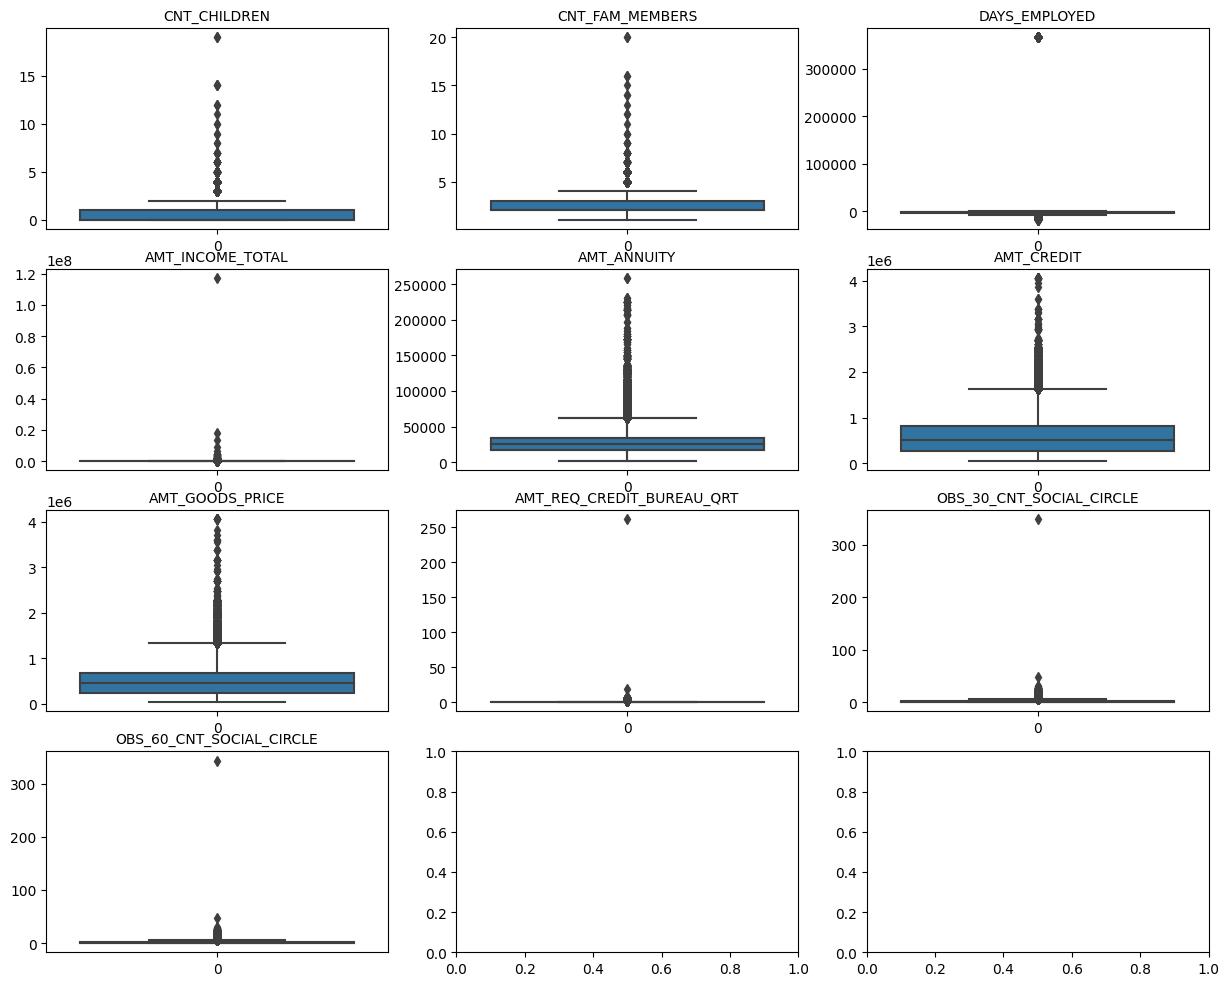

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
sns.boxplot(application['CNT_CHILDREN'], ax= axs[0, 0] )
axs[0, 0].set_title('CNT_CHILDREN', fontsize = 10)
sns.boxplot(application['CNT_FAM_MEMBERS'], ax= axs[0, 1])
axs[0, 1].set_title('CNT_FAM_MEMBERS', fontsize = 10)
sns.boxplot(application['DAYS_EMPLOYED'], ax= axs[0, 2])
axs[0, 2].set_title('DAYS_EMPLOYED', fontsize = 10)
sns.boxplot(application['AMT_INCOME_TOTAL'], ax= axs[1, 0])
axs[1, 0].set_title('AMT_INCOME_TOTAL',fontsize = 10)
sns.boxplot(application['AMT_ANNUITY'], ax= axs[1, 1])
axs[1, 1].set_title('AMT_ANNUITY', fontsize = 10)
sns.boxplot(application['AMT_ANNUITY'], ax= axs[1, 1])
axs[1, 1].set_title('AMT_ANNUITY',fontsize = 10)
sns.boxplot(application['AMT_CREDIT'], ax= axs[1, 2])
axs[1, 2].set_title('AMT_CREDIT', fontsize = 10)
sns.boxplot(application['AMT_GOODS_PRICE'], ax= axs[2, 0])
axs[2, 0].set_title('AMT_GOODS_PRICE', fontsize = 10)
sns.boxplot(application['AMT_REQ_CREDIT_BUREAU_QRT'], ax= axs[2, 1])
axs[2, 1].set_title('AMT_REQ_CREDIT_BUREAU_QRT',fontsize = 10)
sns.boxplot(application['OBS_30_CNT_SOCIAL_CIRCLE'], ax= axs[2, 2])
axs[2, 2].set_title('OBS_30_CNT_SOCIAL_CIRCLE', fontsize = 10)
sns.boxplot(application['OBS_60_CNT_SOCIAL_CIRCLE'], ax= axs[3, 0])
axs[3, 0].set_title('OBS_60_CNT_SOCIAL_CIRCLE', fontsize = 10)
plt.show()

In [38]:
#describe function to take a look at the Previous Application dataset to find out which columns contain outliers.
previous_application.describe(percentiles= [0.75,0.95, 0.99])

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06
mean,1.923089e+06,2.783587e+05,1.490727e+04,1.752703e+05,1.961547e+05,1.778874e+05,1.248412e+01,9.964668e-01,-8.807762e+02,3.140069e+02,2.517885e+03
std,5.325994e+05,1.028150e+05,1.317877e+04,2.927993e+05,3.185951e+05,2.912996e+05,3.334075e+00,5.933577e-02,7.791505e+02,7.128183e+03,4.674019e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
50%,1.923117e+06,2.787210e+05,1.125000e+04,7.105500e+04,8.055000e+04,7.105500e+04,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384284e+06,3.675140e+05,1.682851e+04,1.804410e+05,2.164185e+05,1.804950e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,6.000000e+01
95%,2.753173e+06,4.384437e+05,4.197146e+04,7.875000e+05,8.866867e+05,7.875000e+05,1.800000e+01,1.000000e+00,-8.500000e+01,1.820000e+03,1.125000e+04
99%,2.826903e+06,4.527863e+05,6.575850e+04,1.350000e+06,1.515416e+06,1.350000e+06,2.000000e+01,1.000000e+00,-1.400000e+01,3.570000e+03,1.125000e+04
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,1.125000e+04


Some columns have a maximum value that is far from the 95th or 99th quantiles:
- AMT_ANNUITY
- AMT_APPLICATION
- AMT_CREDIT
- AMT_GOODS_PRICE
- SELLERPLACE_AREA

We will double-check these columns with a box plot to define which columns actually have outliers.

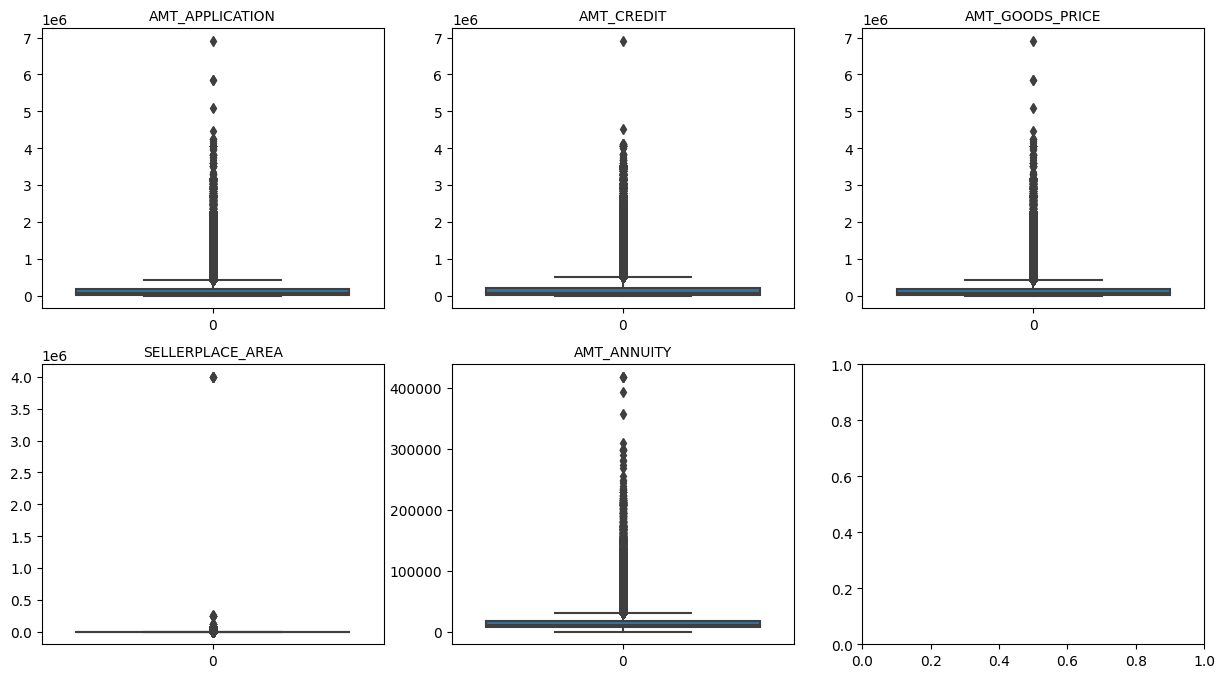

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
sns.boxplot(previous_application['AMT_APPLICATION'], ax= axs[0, 0] )
axs[0, 0].set_title('AMT_APPLICATION', fontsize = 10)
sns.boxplot(previous_application['AMT_CREDIT'], ax= axs[0, 1])
axs[0, 1].set_title('AMT_CREDIT', fontsize = 10)
sns.boxplot(previous_application['AMT_GOODS_PRICE'], ax= axs[0, 2])
axs[0, 2].set_title('AMT_GOODS_PRICE', fontsize = 10)
sns.boxplot(previous_application['SELLERPLACE_AREA'], ax= axs[1, 0])
axs[1, 0].set_title('SELLERPLACE_AREA',fontsize = 10)
sns.boxplot(previous_application['AMT_ANNUITY'], ax= axs[1, 1])
axs[1, 1].set_title('AMT_ANNUITY', fontsize = 10)

plt.show()

In conclusion, we can confirm that these columns contain some outliers because some values are far from the others.

### 5.6 Standardising Values

We can see that some columns contain error values, such as the DAYS columns. We will standardize the values of these columns.

In [40]:
application['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-7997      1
-25164     1
-24927     1
-7861      1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [41]:
application['DAYS_EMPLOYED'].value_counts()

 365243    55180
-200         156
-199         151
-224         151
-230         150
           ...  
-9013          1
-9120          1
-13650         1
-10592         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12563, dtype: int64

In [42]:
previous_application['DAYS_DECISION'].value_counts()

-245     2444
-238     2390
-210     2375
-273     2349
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [43]:
#convert negative values to positive values
def convert_values(x):
    if x < 0:
        return abs(x)
    else:
        return x

In [44]:
application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED'].apply(convert_values)
application['DAYS_BIRTH']= application['DAYS_BIRTH'].apply(convert_values)
application['DAYS_REGISTRATION'] = application['DAYS_REGISTRATION'].apply(convert_values)
application['DAYS_ID_PUBLISH'] = application['DAYS_ID_PUBLISH'].apply(convert_values)
application['DAYS_LAST_PHONE_CHANGE'] = application['DAYS_LAST_PHONE_CHANGE'].apply(convert_values)

In [45]:
previous_application['DAYS_DECISION'] = previous_application['DAYS_DECISION'].apply(convert_values)

## 6. Data Analysis

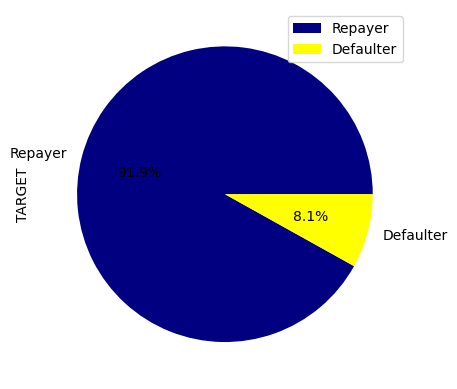

In [46]:
target = application['TARGET'].value_counts(normalize= True)
target.index = ['Repayer', 'Defaulter']
target.plot.pie(autopct='%3.1f%%', colors=['navy', 'yellow'], legend=True)
plt.show()

*The insights:*  
- The target column is imbalanced with 91% repairs and 8.1% defaulters.
- The bank should identify the characteristics of each type to avoid loan default.

### 6.1 Univariate and bivariate analysis with Target variable

#### 6.1.1. Categorical Analysis

In [47]:
##def functions to plot the distribution of each column and comebine with Target variable.
def plot_columns(application, column):
    df = application.groupby(by=[column, 'TARGET']).size().reset_index(name='VALUE')
    df = pd.pivot_table(df, values='VALUE', index= column, columns= 'TARGET' , aggfunc=np.sum)
    df.plot(kind='bar', stacked=False, color = ['navy','yellow'], fontsize=8)

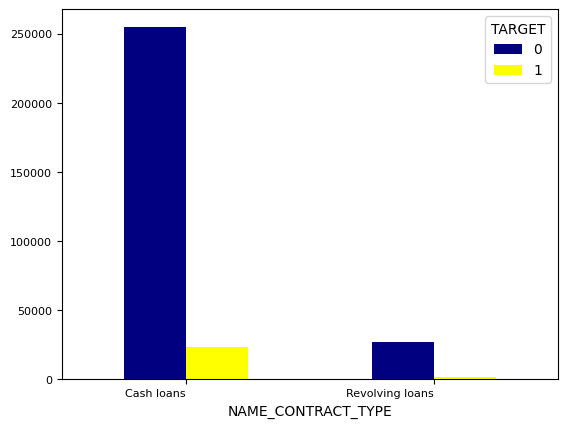

In [48]:
plot_columns(application,'NAME_CONTRACT_TYPE')
plt.xticks(rotation=360, ha='right')
plt.show()

In [49]:
# due to data imbalance, we calculate the percentage of repayer / defaulter.
C = application[application['NAME_CONTRACT_TYPE'] == 'Cash loans']['TARGET'].value_counts()
R = application[application['NAME_CONTRACT_TYPE'] == 'Revolving loans']['TARGET'].value_counts()
print('The ratio of repayer to defaulter of Cash loans:', C[0]/C[1])
print('The ratio of repayer to defaulter of Revolving loans:', R[0]/R[1])

The ratio of repayer to defaulter of Cash loans: 10.981310021101589
The ratio of repayer to defaulter of Revolving loans: 17.08726567550097


*The insights:*
- The majority of applications are for cash loans. The variable is imbalance, so we have to apply a new scale to compare these two types of contracts.
- According to the ratio, clients who apply for cash loans are more likely to default than clients who apply for revolving loans.
 

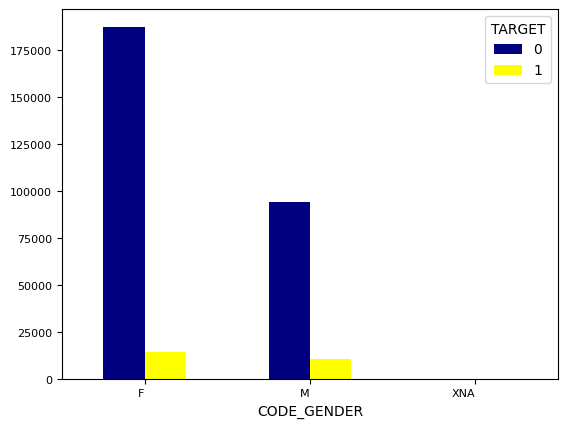

In [50]:
plot_columns(application,'CODE_GENDER')
plt.xticks(rotation=360, ha='right')
plt.show()

In [51]:
F = application[application['CODE_GENDER'] == 'F']['TARGET'].value_counts()
M = application[application['CODE_GENDER'] == 'M']['TARGET'].value_counts()
print('The ratio of repayer to defaulter of Female:', F[0] / F[1])
print('The ratio of repayer to defaulter of Male:', M[0] / M[1])

The ratio of repayer to defaulter of Female: 13.267232837933475
The ratio of repayer to defaulter of Male: 8.832581312276744


*The insights:*
- The number of female customers is higher than the number of male customers.
- Based on the ratio, female clients have a higher ability to pay on time than male clients.

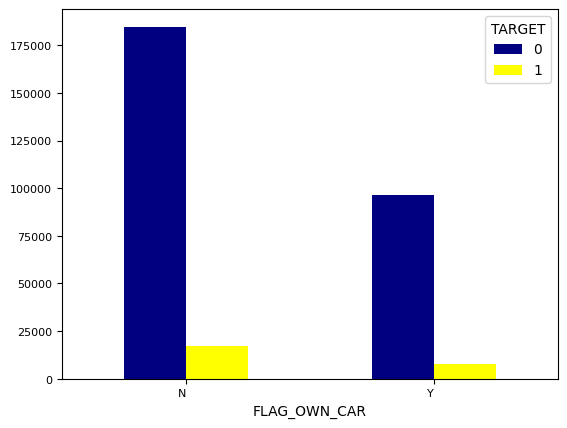

In [52]:
plot_columns(application,'FLAG_OWN_CAR')
plt.xticks(rotation=360, ha='right')
plt.show()

In [53]:
Y = application[application['FLAG_OWN_CAR'] == 'Y']['TARGET'].value_counts()
N = application[application['FLAG_OWN_CAR'] == 'N']['TARGET'].value_counts()
print('The ratio of repayer to defaulter of Car owners:', Y[0] / Y[1])
print('The ratio of repayer to defaulter of Non-car owners:', N[0] / N[1])

The ratio of repayer to defaulter of Car owners: 12.780245934153115
The ratio of repayer to defaulter of Non-car owners: 10.739552455681489


*The insight:*
- Most of the clients don't own cars.
- Based on the ratio, car owners have a higher ability to pay on time than non-car owners. It can explain the fact that car owners have higher financial ability than non-car owners. Hence, they are less likely to default.


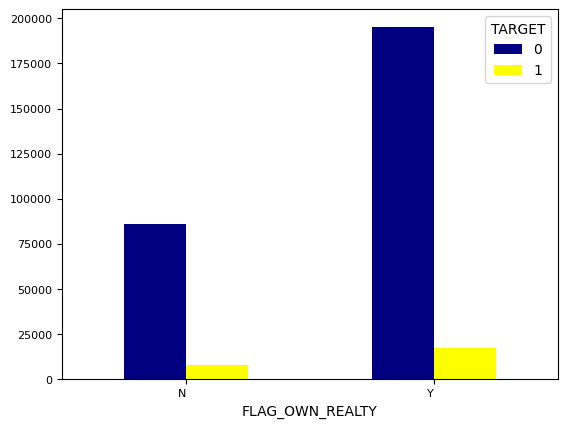

In [54]:
plot_columns(application,'FLAG_OWN_REALTY')
plt.xticks(rotation=360, ha='right')
plt.show()

In [55]:
Y = application[application['FLAG_OWN_REALTY'] == 'Y']['TARGET'].value_counts()
N = application[application['FLAG_OWN_REALTY'] == 'N']['TARGET'].value_counts()
print('The ratio of repayer to defaulter of Realty owners:', Y[0] / Y[1])
print('The ratio of repayer to defaulter of Non-realty owners:', N[0] / N[1])

The ratio of repayer to defaulter of Realty owners: 11.537285233512428
The ratio of repayer to defaulter of Non-realty owners: 10.985059379389606


*The insight:*
- The majority of the clients own realty.
- The realty owners have a higher ability to pay on time than non-realty owners. However, we can see that gap between two types isn't transparent because the realty is a high value asset. Clients with average finances are difficult to have the realty, but that does not mean they will have a high probability of defaulting. Therefore, in this case, we can consider that the correlation between realty ownership and default is nonexistent.

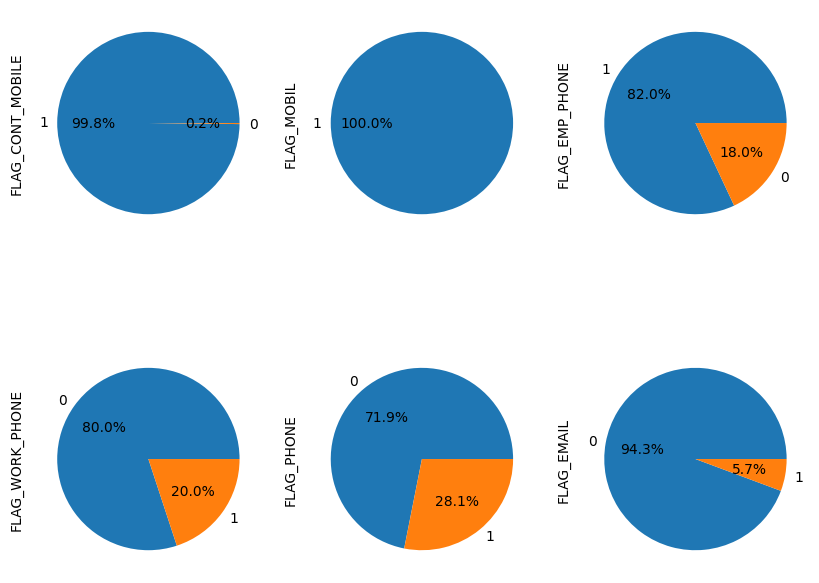

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
application['FLAG_CONT_MOBILE'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,0])
application['FLAG_MOBIL'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,1])
application['FLAG_EMP_PHONE'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,2])
application['FLAG_WORK_PHONE'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,0])
application['FLAG_PHONE'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,1])
application['FLAG_EMAIL'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,2])
plt.show()

*The insights:* 
- Following the charts, these columns are data imbalances. The clients just provided their mobile phone and don't want to share their email, work phone, or home phone. Also, 99.8% of mobile phones are reachable. In conclusion, the missing information about contact can be affected by other reasons, not because the clients are likely to default because they don't provide information.

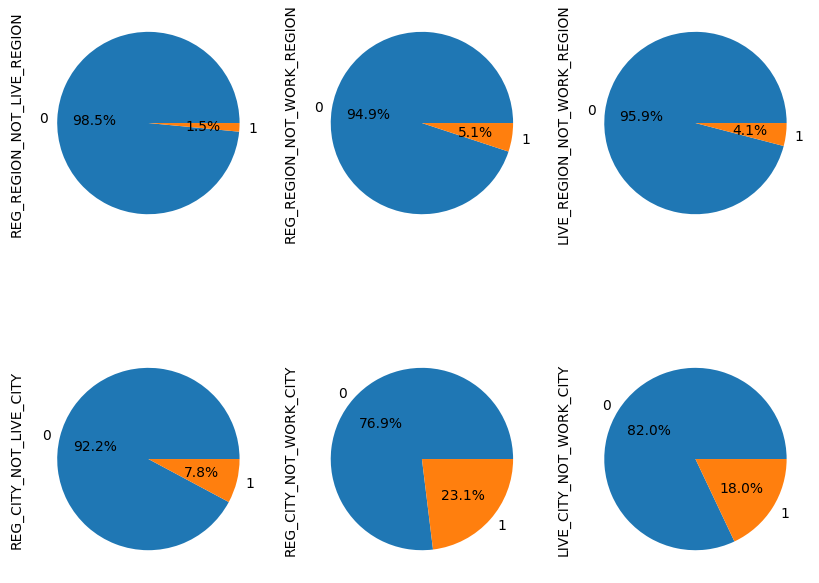

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
application['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,0])
application['REG_REGION_NOT_WORK_REGION'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,1])
application['LIVE_REGION_NOT_WORK_REGION'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[0,2])
application['REG_CITY_NOT_LIVE_CITY'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,0])
application['REG_CITY_NOT_WORK_CITY'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,1])
application['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', ax = axs[1,2])
plt.show()

*Insights:*
- The permanent address, contract address, and work address of the majority of customers are matched together at the regional level. The difference between living in a city and working in a city is high, but in fact, it is also normal.

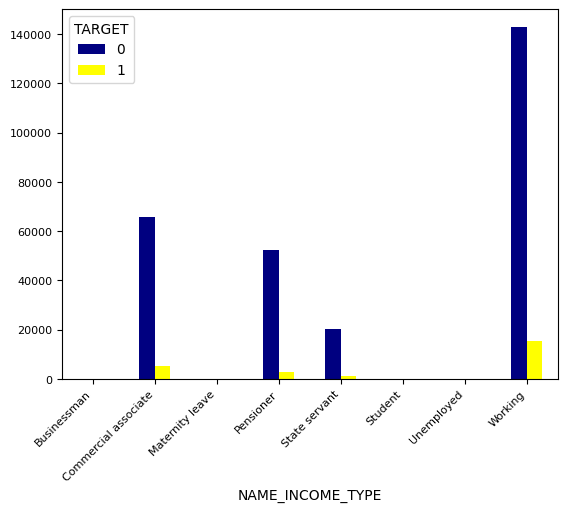

In [58]:
plot_columns(application,'NAME_INCOME_TYPE')
plt.xticks(rotation=45, ha='right')
plt.show()

*The insights:*
- The working type has the most repayers, and the default risk rate is much lower than that of the unemployed and maternity leave. It can explain the fact that clients with income from subsidies find it difficult to pay loans on time.

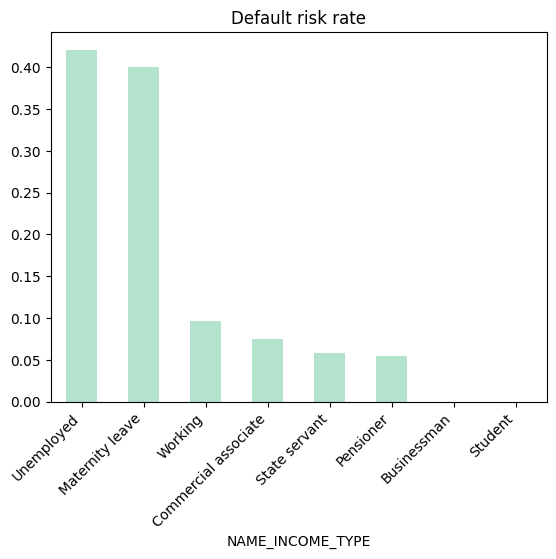

In [59]:
application.groupby(by = 'NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Pastel2')
plt.xticks(rotation=45, ha = 'right')
plt.title('Default risk rate')
plt.show()

*The insight:*
- We can see that the working type has the most repayers, but the default risk rate is lower than that of unemployed and maternity leave. Therefore, the bank should carefully approve the applications for unemployment and maternity leave.

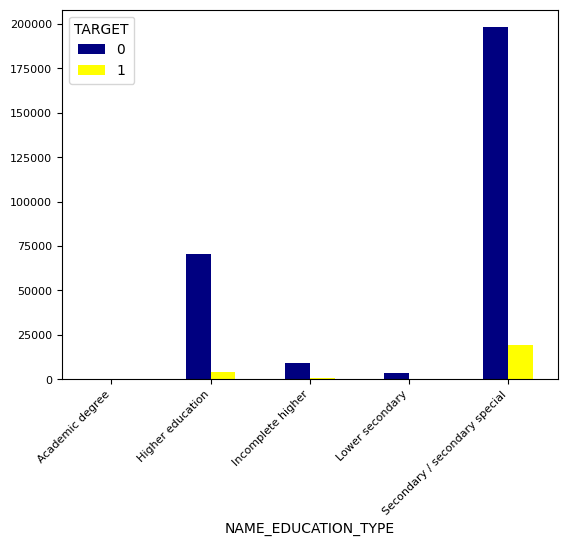

In [60]:
plot_columns(application,'NAME_EDUCATION_TYPE')
plt.xticks(rotation=45, ha='right')
plt.show()

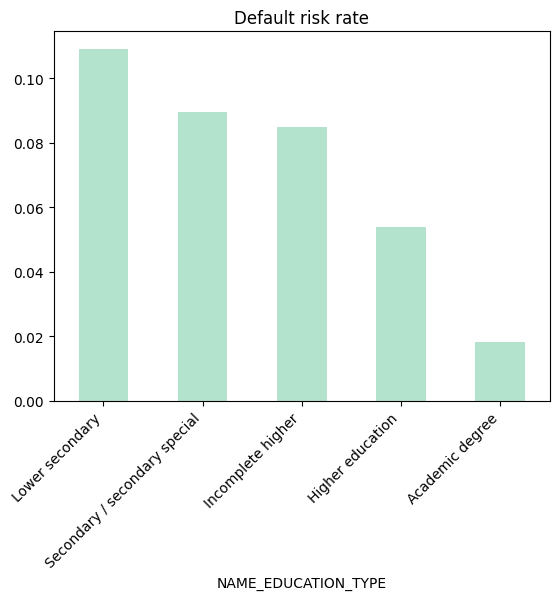

In [61]:
application.groupby(by = 'NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Pastel2')
plt.xticks(rotation=45, ha = 'right')
plt.title('Default risk rate')
plt.show()

*The insight:*
- The number of clients who have secondary or secondary special types is very high, but this type also has a high default rate.
- The default risk decreased with education levels. It can explain the fact that clients with high education levels have more awareness of the need to pay the loans on time.

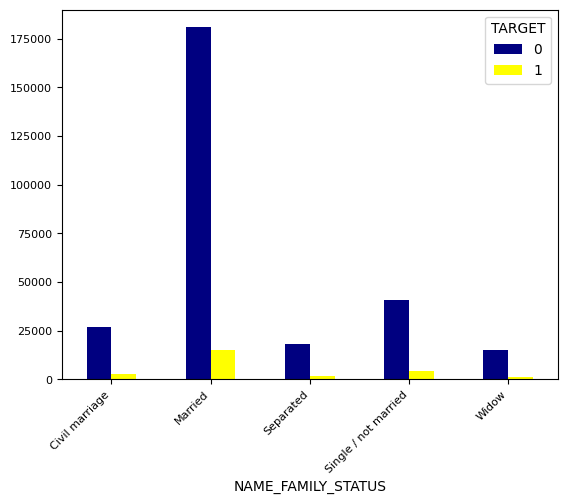

In [62]:
plot_columns(application,'NAME_FAMILY_STATUS')
plt.xticks(rotation=45, ha='right')
plt.show()

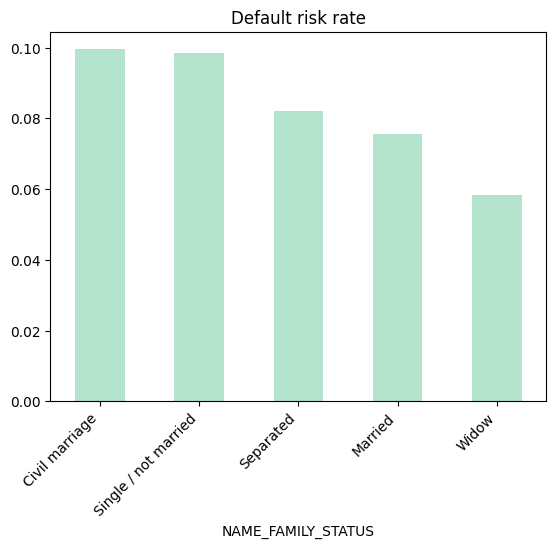

In [63]:
application.groupby(by = 'NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Pastel2')
plt.xticks(rotation=45, ha = 'right')
plt.title('Default risk rate')
plt.show()

*The insight:*
- Married clients are more likely to pay on time than other groups because the quantity is very high and the default risk is lower than for others.
- Single/unmarried is the second most common, followed by married, but it has a high default risk. The bank should be more careful with this type.

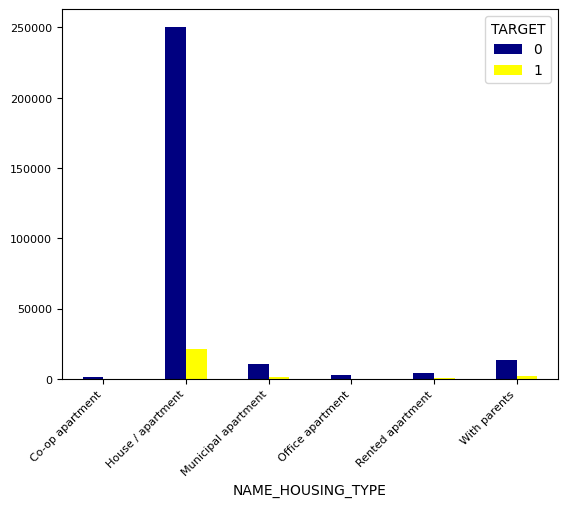

In [64]:
plot_columns(application,'NAME_HOUSING_TYPE')
plt.xticks(rotation=45, ha='right')
plt.show()

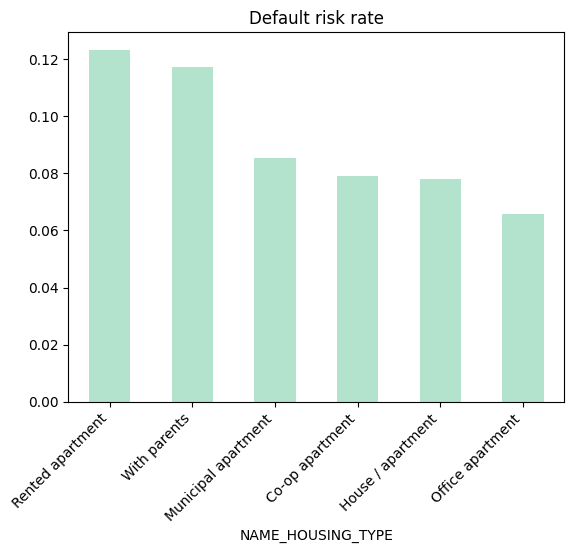

In [65]:
application.groupby(by = 'NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Pastel2')
plt.xticks(rotation=45, ha = 'right')
plt.title('Default risk rate')
plt.show()

*The insights:*
- The clients who have a house or apartment are more likely to pay on time than other groups because the quantity is very high and the default risk is lower than for others.
- The clients who have to rent department or live with parents are likely to default.

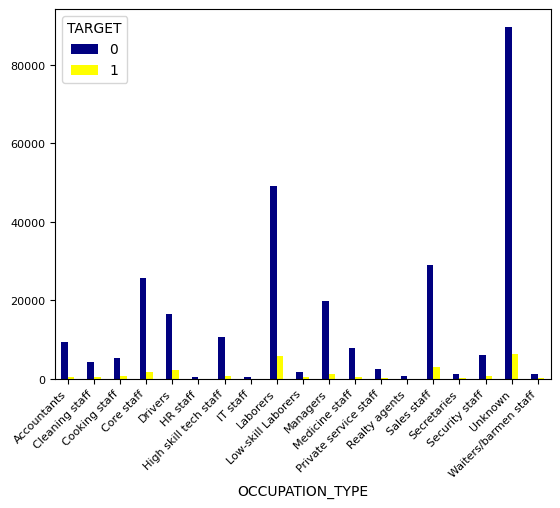

In [66]:
plot_columns(application,'OCCUPATION_TYPE')
plt.xticks(rotation=45, ha='right')
plt.show()

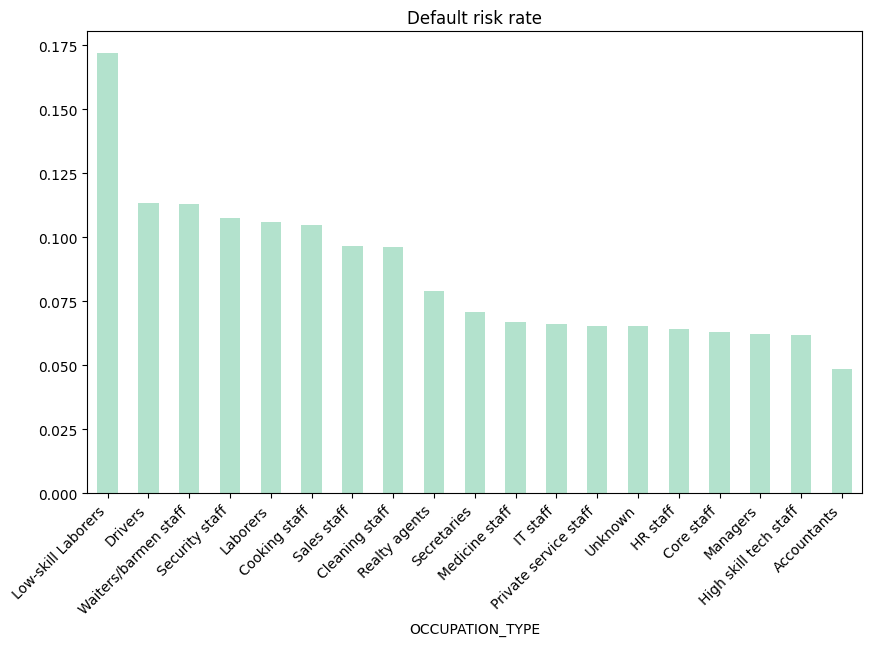

In [67]:
plt.figure(figsize= (10,6))
application.groupby(by = 'OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Pastel2')
plt.xticks(rotation=45, ha = 'right')
plt.title('Default risk rate')
plt.show()

*The insights:*
- Laborers and sales staff have the highest number of repayers, but the default risk is also high.
- Managers and core staff are also common and look like they provide more safety with low default risk.
- Drivers have a significant number of defaulters, but there is a very high default risk.

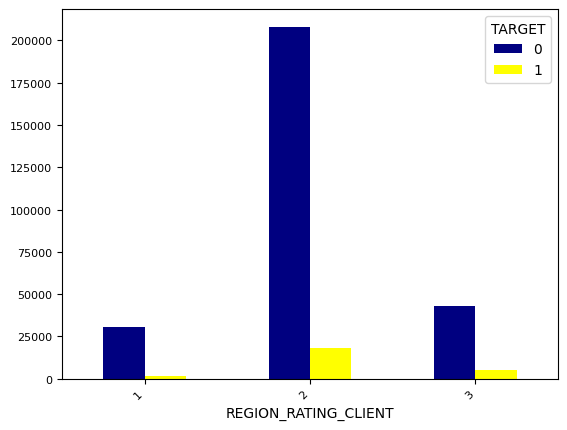

In [68]:
plot_columns(application,'REGION_RATING_CLIENT')
plt.xticks(rotation=45, ha='right')
plt.show()

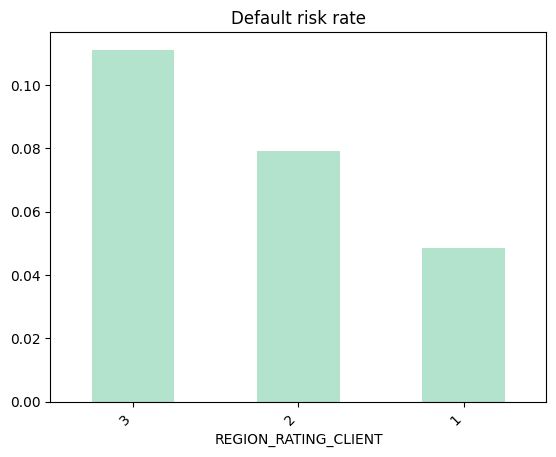

In [69]:
application.groupby(by = 'REGION_RATING_CLIENT')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Pastel2')
plt.xticks(rotation=45, ha = 'right')
plt.title('Default risk rate')
plt.show()

*The insights:*
- The majority of clients living in the region have a rating 2, but the region with a rating of 3 has the highest default risk.

#### 6.1.2. Numerical Anlaysis

In [70]:
#convert DAYS_BIRTH to AGE
application['AGE'] = round(application['DAYS_BIRTH']/365)

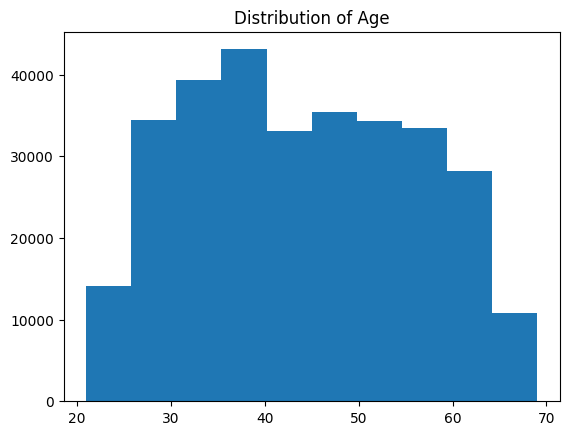

In [71]:
#distribution of Age
plt.hist(application['AGE'])
plt.title('Distribution of Age')
plt.show()

In [72]:
#Divide to age group.
application['AGE'] = pd.cut(application['AGE'], bins = [20,30,40,50,60,70], labels=['20 - 30', ' 30 - 40', '40-50','50-60','>60'])

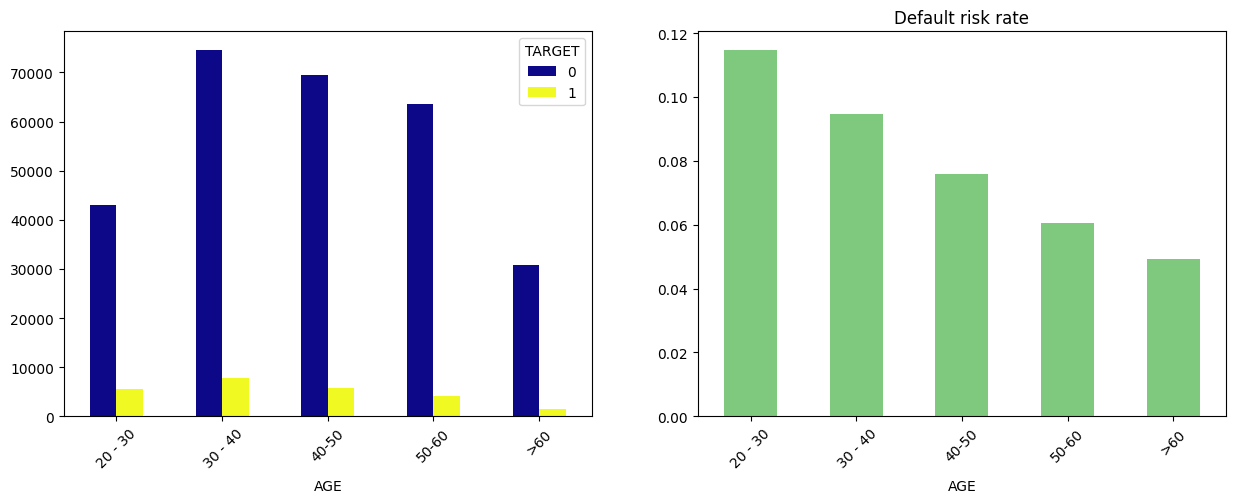

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = application.groupby(by= ['AGE','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'AGE', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax= axs[0])
axs[0].tick_params(axis='x', rotation=45)
application.groupby(by = 'AGE')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].tick_params(axis='x', rotation=45)
plt.title('Default risk rate')
plt.show()

*The insights:*
- The age group from 30 to 50 has the highest number of repayers; however, the default risk decreases with increasing age.
- The age group from 40 - 50 is more safety.

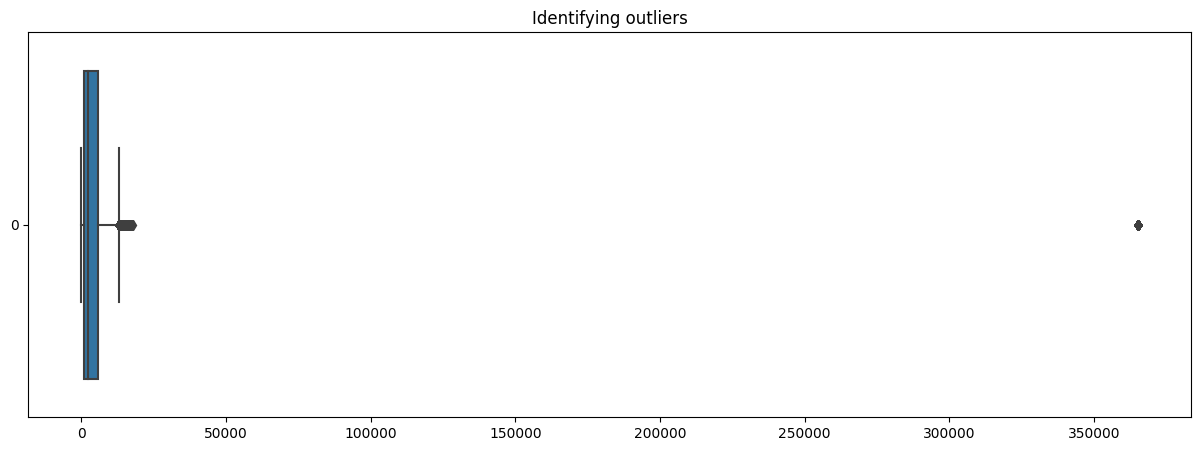

In [74]:
# as we defined DAYS_EMPLOYED has outlier above, we create a boxplot to define the outliers again.
plt.figure(figsize= (15,5))
sns.boxplot(application['DAYS_EMPLOYED'], orient= 'h')
plt.title('Identifying outliers')
plt.show()

In [75]:
em_year = application[application['DAYS_EMPLOYED'] < 50000]

In [76]:
em_year['EMPLOYED_YEARS'] = em_year['DAYS_EMPLOYED'] / 365

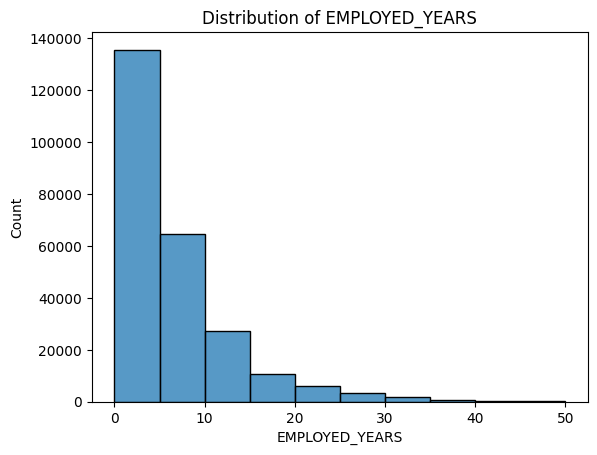

In [77]:
#distribution of DAYS_EMPLOYED by years
sns.histplot(em_year['EMPLOYED_YEARS'], bins= [0,5,10,15,20,25,30,35,40,50])
plt.title('Distribution of EMPLOYED_YEARS')
plt.show()

In [78]:
em_year['EMPLOYED_YEARS'] = pd.cut(em_year['EMPLOYED_YEARS'], bins= [0,5,10,15,20,25,50] , labels=['0-5','5-10','10-15','15-20','20-25','>25'])

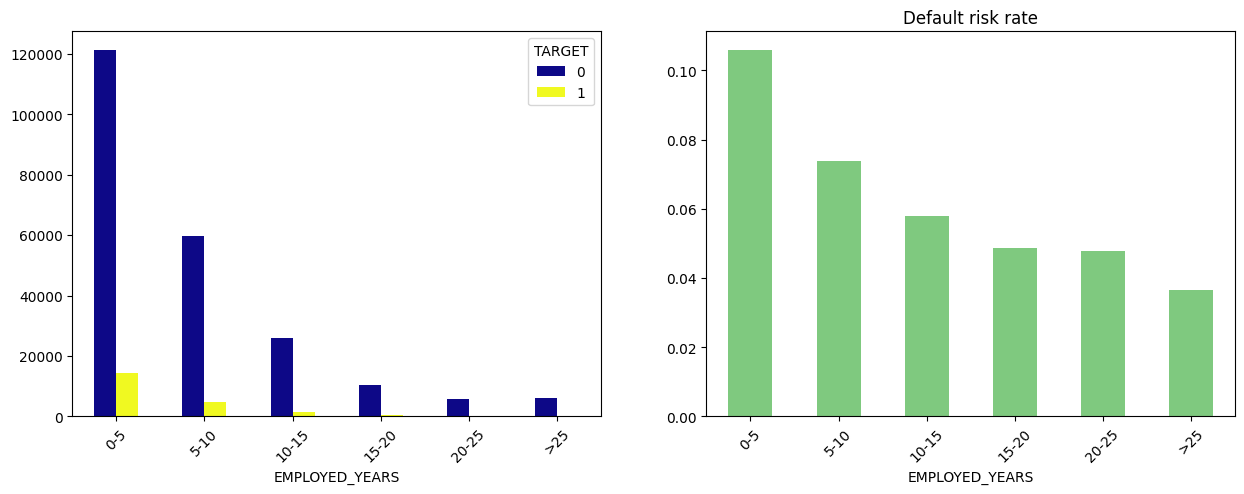

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = em_year.groupby(by= ['EMPLOYED_YEARS','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'EMPLOYED_YEARS', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax= axs[0])
axs[0].tick_params(axis='x', rotation=45)
em_year.groupby(by = 'EMPLOYED_YEARS')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].tick_params(axis='x', rotation=45)
plt.title('Default risk rate')
plt.show()

*The insights:*
- The majority of clients have worked for 0 to 5 years. The probability of default declines with more years of work. It proves that long-term employees who have saved a particular amount of money have more solid financial abilities than clients who have less experience.


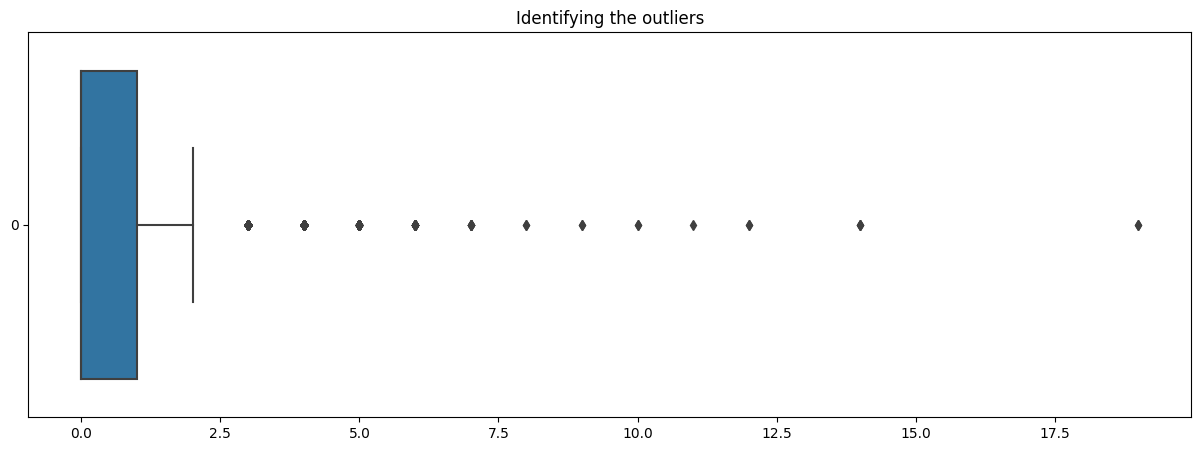

In [80]:
plt.figure(figsize= (15,5))
sns.boxplot(application['CNT_CHILDREN'], orient= 'h')
plt.title('Identifying the outliers')
plt.show()

In [81]:
child = application[application['CNT_CHILDREN'] <= 4]

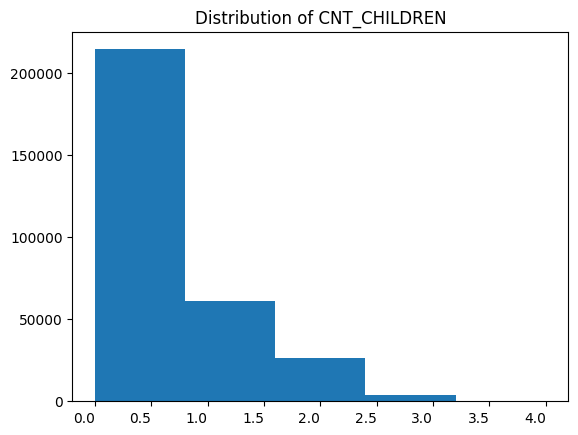

In [82]:
#distribution of CNT_CHILDREN after removing the outliers
plt.hist(child['CNT_CHILDREN'], bins = 5)
plt.xticks(rotation=360, ha = 'right')
plt.title('Distribution of CNT_CHILDREN')
plt.show()

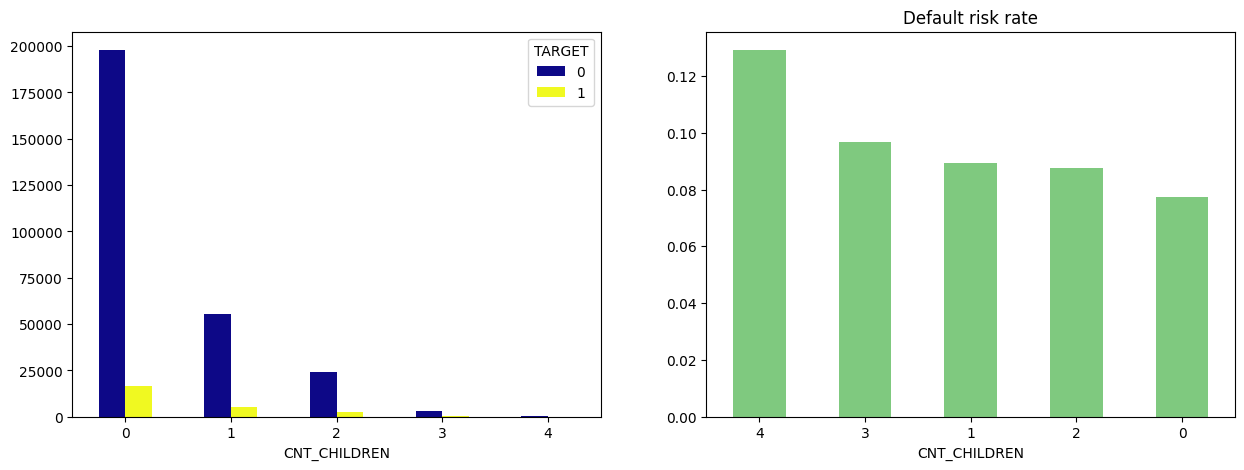

In [83]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = child.groupby(by= ['CNT_CHILDREN','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'CNT_CHILDREN', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax=axs[0])
axs[0].tick_params(axis='x', rotation=360)
child.groupby(by = 'CNT_CHILDREN')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax = axs[1])
axs[1].tick_params(axis='x', rotation=360)
plt.title('Default risk rate')
plt.show()

*The insights:*
- Clients who have several kids are more likely to default. Clients without kids will be the most secure. It explains the fact that clients have to pay a lot of money to raise their children, so it will be more difficult to pay on time.

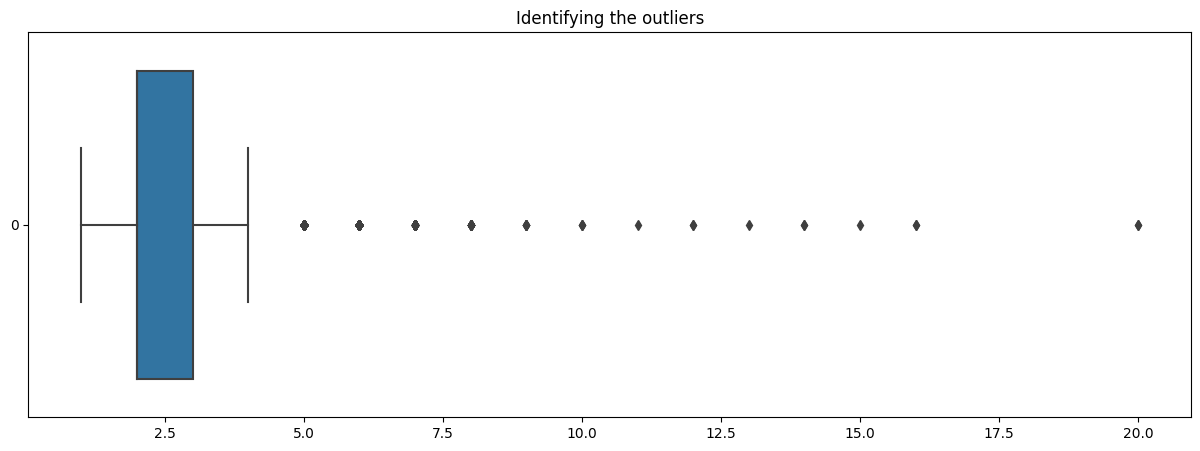

In [84]:
plt.figure(figsize= (15,5))
sns.boxplot(application['CNT_FAM_MEMBERS'], orient= 'h')
plt.title('Identifying the outliers')
plt.show()

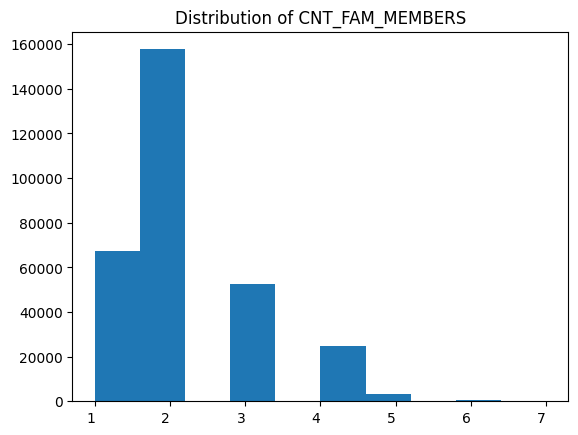

In [85]:
#distribution of CNT_FAM_MEMBERS after removing the outliers
fam_mem = application[application['CNT_FAM_MEMBERS'] <= 7]
plt.hist(fam_mem['CNT_FAM_MEMBERS'])
plt.xticks(rotation=360, ha = 'right')
plt.title('Distribution of CNT_FAM_MEMBERS')
plt.show()

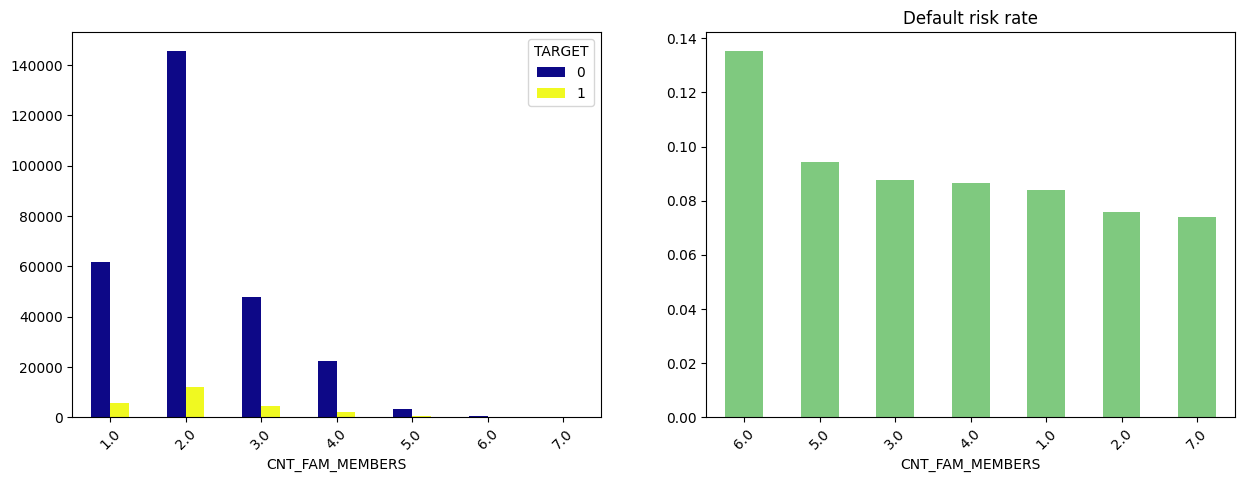

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = fam_mem.groupby(by= ['CNT_FAM_MEMBERS','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'CNT_FAM_MEMBERS', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax= axs[0])
axs[0].tick_params(axis='x', rotation=45)
fam_mem.groupby(by = 'CNT_FAM_MEMBERS')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].tick_params(axis='x', rotation=45)
plt.title('Default risk rate')
plt.show()

*The insights:*
- Clients with two members in their family are the safest group because they have the highest number of repayers and the lowest default risk. 

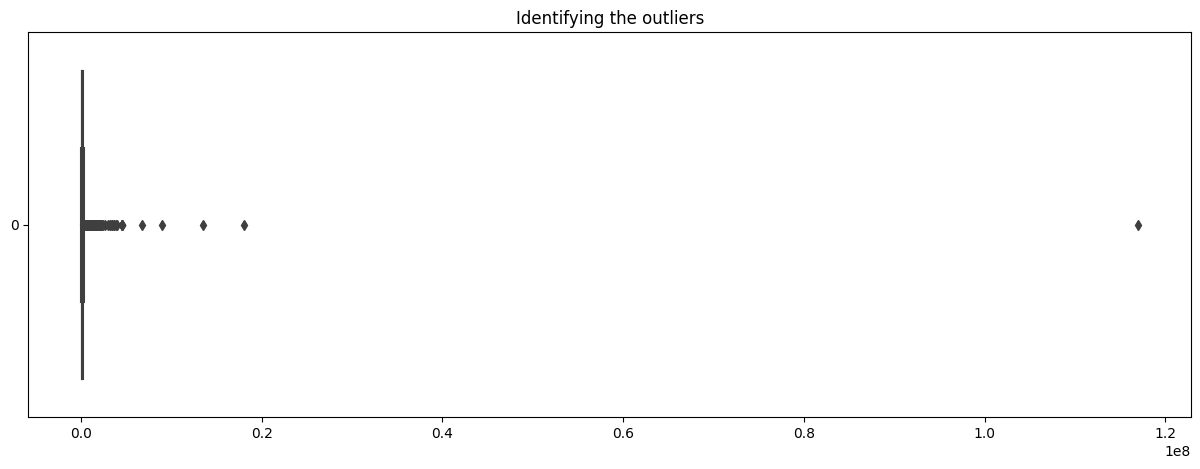

In [87]:
plt.figure(figsize= (15,5))
sns.boxplot(application['AMT_INCOME_TOTAL'], orient= 'h')
plt.title('Identifying the outliers')
plt.show()

In [88]:
income = application[application['AMT_INCOME_TOTAL'] <= np.percentile(application['AMT_INCOME_TOTAL'], 99)]

(array([ 69254., 149502.,  61167.,  17009.,   6205.]),
 array([ 25650. , 112470.3, 199290.6, 286110.9, 372931.2, 459751.5]),
 <BarContainer object of 5 artists>)

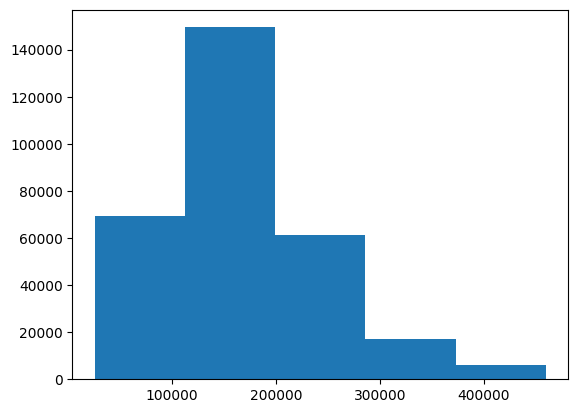

In [89]:
plt.hist(income['AMT_INCOME_TOTAL'], bins = 5)
plt.show()

In [90]:
income['AMT_INCOME_TOTAL'] = pd.cut(income['AMT_INCOME_TOTAL'], bins= [0,100000,150000,200000,250000,300000,350000,400000,500000] , 
                                   labels=['<100.000','100.000-150.000','150.000-200.000','200.000-250.000','250.000-300.000','300.000-350.000','350.000-400.000','>400.000' ])

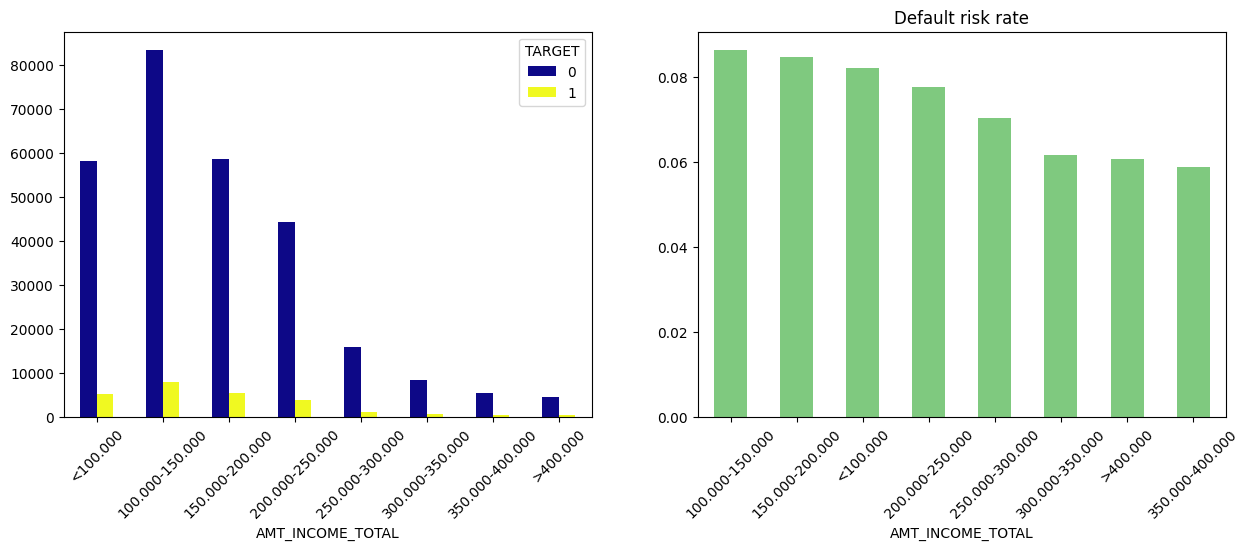

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = income.groupby(by= ['AMT_INCOME_TOTAL','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'AMT_INCOME_TOTAL', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax= axs[0])
axs[0].tick_params(axis='x', rotation=45)
income.groupby(by = 'AMT_INCOME_TOTAL')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_title('Default risk rate')
plt.show()

*The insights:*
- The majority of clients earn between 100,000 and 150,000. However, this group also has a high default risk rate.
- The default risk rate decreases following the increasing income of clients.

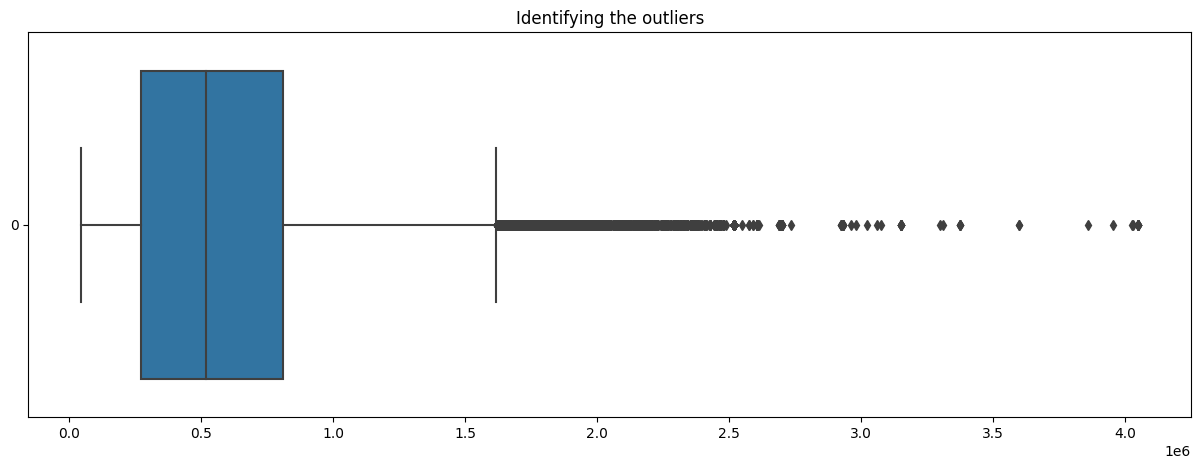

In [92]:
plt.figure(figsize= (15,5))
sns.boxplot(application['AMT_CREDIT'], orient= 'h')
plt.title('Identifying the outliers')
plt.show()

In [93]:
credit = application[application['AMT_CREDIT'] <= 2000000]

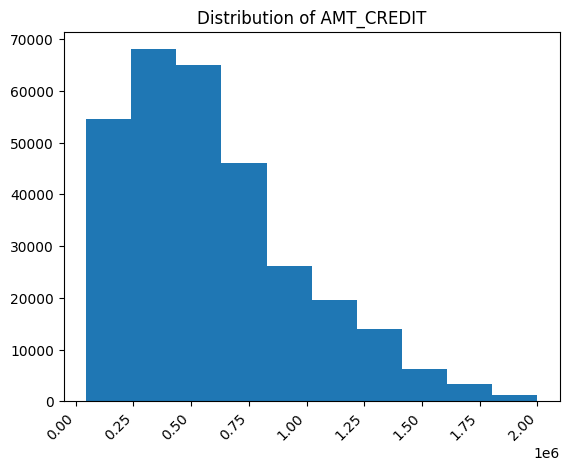

In [94]:
plt.hist(credit['AMT_CREDIT'], bins = 10)
plt.title('Distribution of AMT_CREDIT')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [95]:
credit['AMT_CREDIT'] = pd.cut(credit['AMT_CREDIT'], bins= [0,250000,500000,750000,1000000,1250000, 1500000,2000000] , 
                                   labels=['< 250.000', '250.000 - 500.000','500.000 - 750.000','750.000 - 1.000.000','1.000.000 - 1.250.000', '1.250.000 - 1.500.000', '> 1.500.000' ])

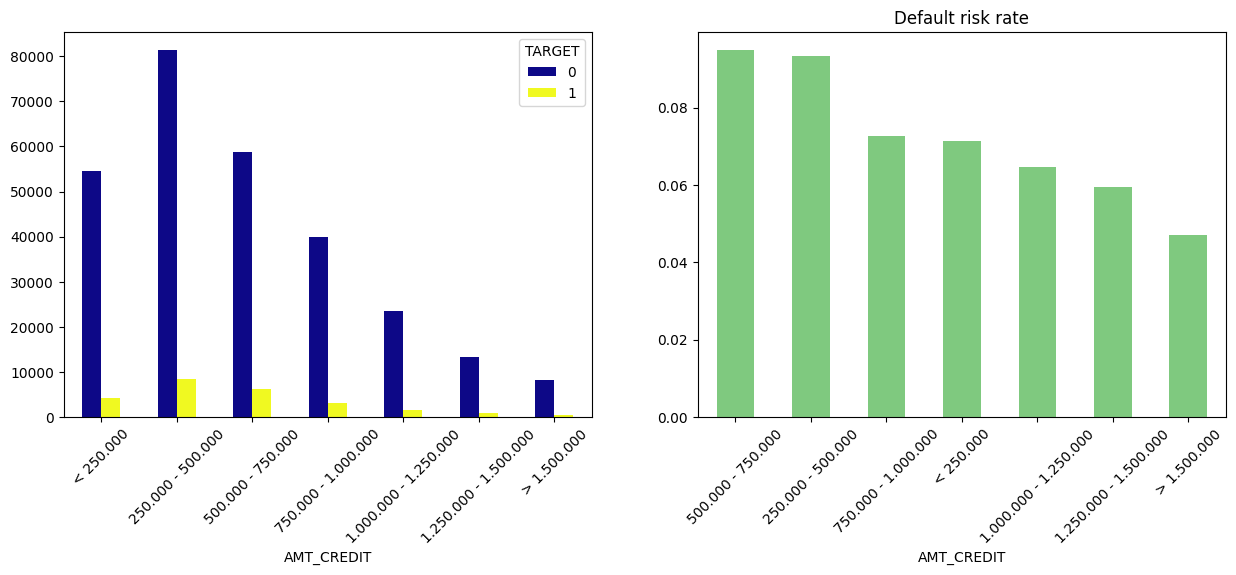

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = credit.groupby(by= ['AMT_CREDIT','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'AMT_CREDIT', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax= axs[0])
axs[0].tick_params(axis='x', rotation=45)
credit.groupby(by = 'AMT_CREDIT')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_title('Default risk rate')
plt.show()

*The insights:*
- The majority of clients applys for credit amount of loans between 250,000 and 500,000. However, this group also has a high default risk rate.
- The default risk rate decreases following the amount of credit.

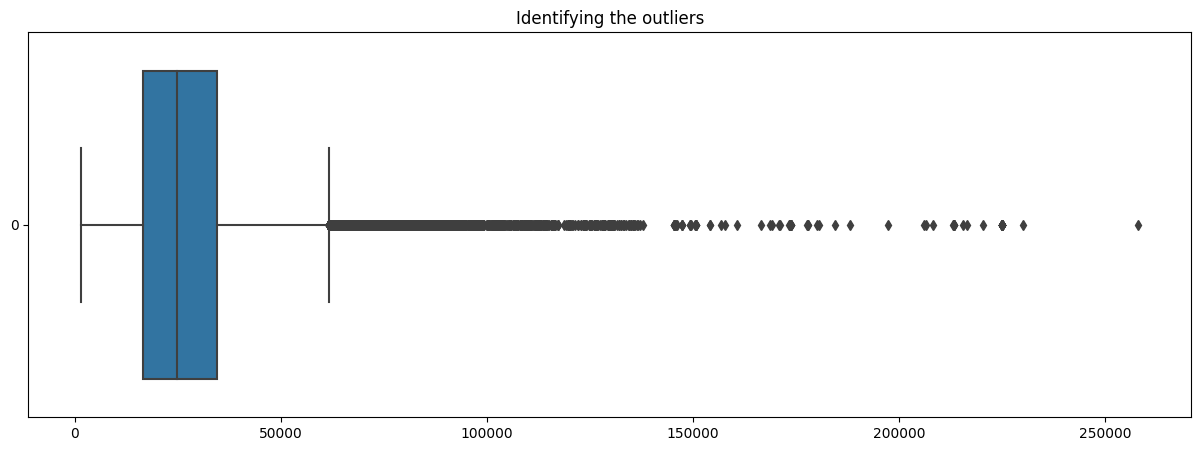

In [97]:
plt.figure(figsize= (15,5))
sns.boxplot(application['AMT_ANNUITY'], orient= 'h')
plt.title('Identifying the outliers')
plt.show()

In [98]:
annuity = application[application['AMT_ANNUITY'] <= 100000]

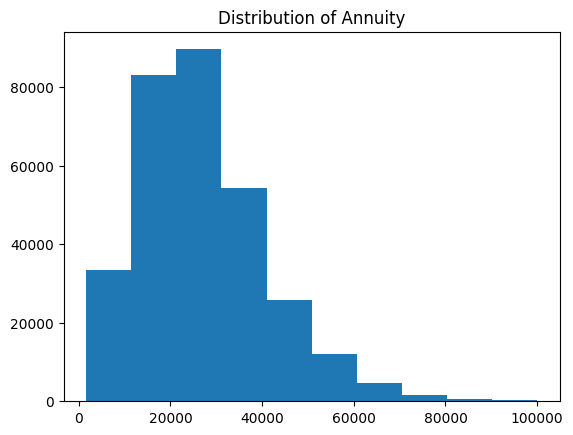

In [99]:
plt.hist(annuity['AMT_ANNUITY'], bins = 10)
plt.title('Distribution of Annuity')
plt.show()

In [100]:
annuity['AMT_ANNUITY'] = pd.cut(annuity['AMT_ANNUITY'], 
                                bins=[0, 20000, 40000, 60000, 80000, 100000], 
                                labels=['< 20.000', '20.000 - 40.000', '40.000 - 60.000', 
                                 '60.000 - 80.000', '> 80.000'])

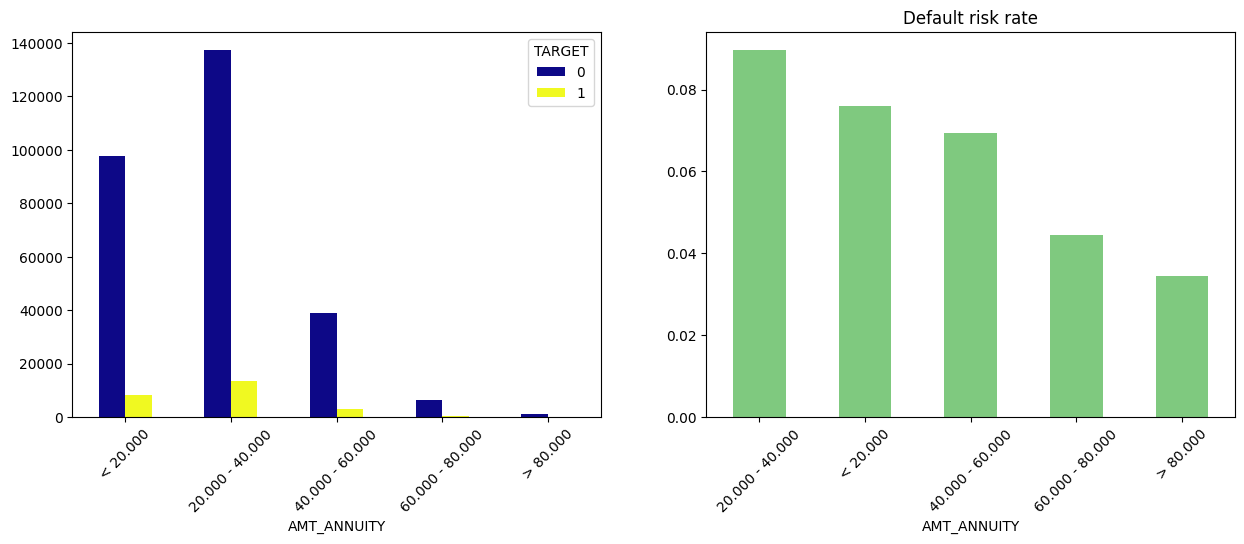

In [101]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df = annuity.groupby(by= ['AMT_ANNUITY','TARGET'])['TARGET'].count().reset_index(name='VALUE')
df = pd.pivot_table(df, values='VALUE', index= 'AMT_ANNUITY', columns= 'TARGET' , aggfunc=np.sum)
df.plot(kind='bar', stacked=False, cmap= 'plasma', fontsize=10, ax= axs[0])
axs[0].tick_params(axis='x', rotation=45)
annuity.groupby(by = 'AMT_ANNUITY')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_title('Default risk rate')
plt.show()


*The insights:*
- Although the number of applications under 20,000 is smaller than those between 20,000 and 40.000, this group is also safer as the default risk is reasonable. The default risk decreases with increasing annuity amounts.

### 6.3 Merged Dataset

Check the insights to see if the clients are returning after the previous application.

In [102]:
#merge application dataset with the previous dataset
merge_data = application.merge(previous_application, how = 'inner', on = 'SK_ID_CURR')

In [103]:
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,20 - 30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [104]:
target_0 = merge_data[merge_data['TARGET'] == 0]
target_1 = merge_data[merge_data['TARGET'] == 1]

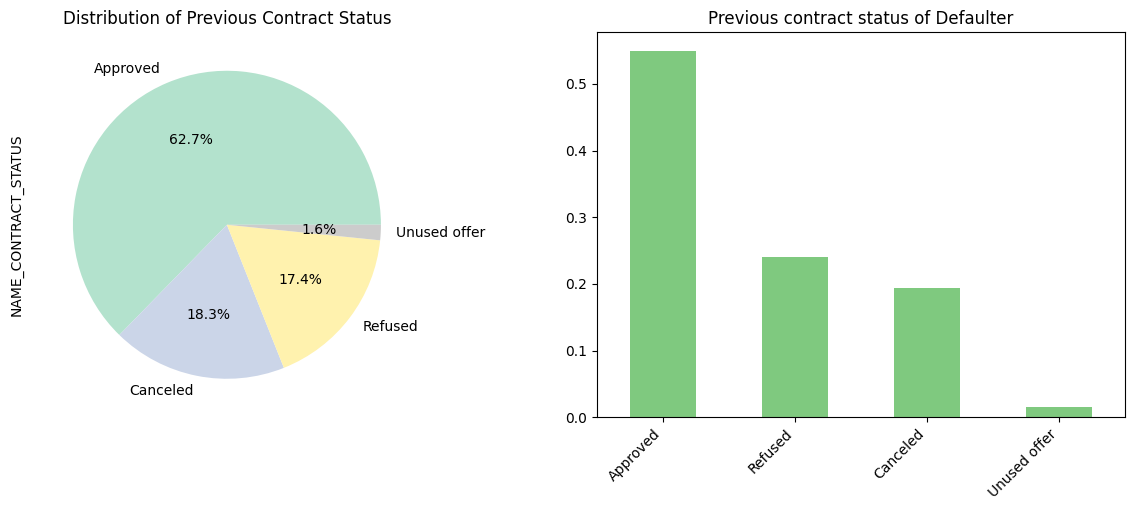

In [105]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
merge_data['NAME_CONTRACT_STATUS'].value_counts(normalize= True).plot.pie(autopct='%3.1f%%', cmap='Pastel2', ax = axs[0])
axs[0].set_title('Distribution of Previous Contract Status')
target_1['NAME_CONTRACT_STATUS'].value_counts(normalize= True).sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
plt.xticks(rotation= 45, ha = 'right')
plt.title('Previous contract status of Defaulter')
plt.show()

*The insights:*
- 62.7% of clients who have been approved before return to continue to apply, while more than 30% of returned clients were rejected application previously.
- More than 50% of clients who have been approved for previous applications still face payment difficulties.

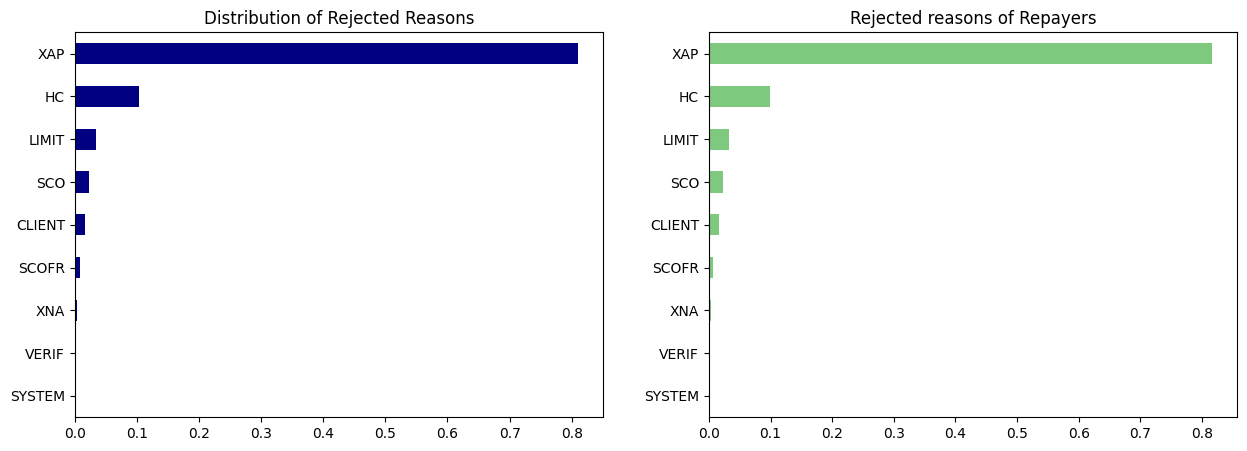

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
merge_data['CODE_REJECT_REASON'].value_counts(normalize= True).sort_values(ascending= True).plot(kind= 'barh', color = 'navy', ax= axs[0])
axs[0].set_title('Distribution of Rejected Reasons')
target_0['CODE_REJECT_REASON'].value_counts(normalize= True).sort_values(ascending= True).plot(kind= 'barh', cmap = 'Accent', ax= axs[1])
axs[1].set_title('Rejected reasons of Repayers')
plt.show()

*The insights:*
- Among the rejected applications, XAP is the most common reason.
- In the top rejected reasons of repayers,  80% of applications are rejected for XAP reasons. This may also indicate that, although repayers have a good payment history, they may still have difficulty meeting the requirements of the applications and may therefore be rejected.

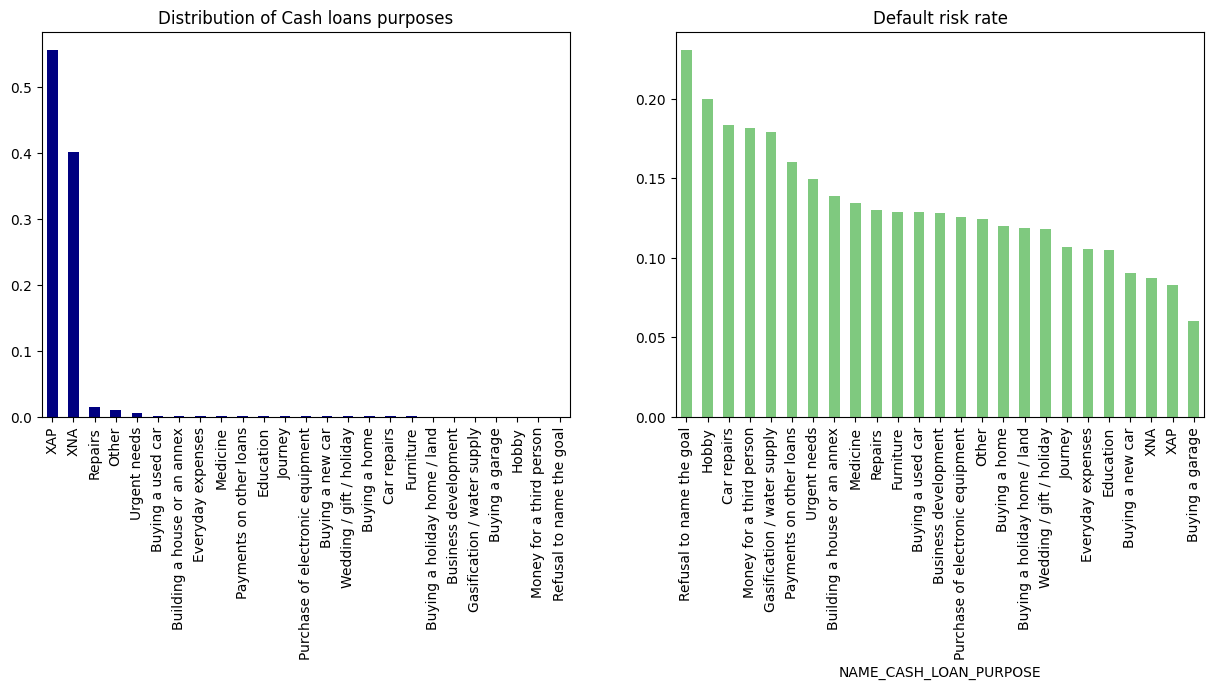

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize= True).sort_values(ascending= False).plot(kind= 'bar', color = 'navy', ax= axs[0])
axs[0].set_title('Distribution of Cash loans purposes')
merge_data.groupby(by = 'NAME_CASH_LOAN_PURPOSE')['TARGET'].mean().sort_values(ascending= False).plot(kind= 'bar', cmap = 'Accent', ax= axs[1])
axs[1].set_title('Default risk rate')
plt.show()

*The insights:*
- XAP and XNA are the most common purposes of applications.
- Refusal to name the goal and hobby purpose have a high default risk. It indicates that clients who don't have a specific cash loan purpose or are borrowing just for their hobby are likely to default because of the unclear information.

### 6.2 Correlation and Multivariate analysis

Finding top correlation for the Client with payment difficulties and all other cases (Target variable)

#### 6.2.1. Numerical Variables

In [108]:
#calculate the correlation coefficient of Application dataset
corr = application.corr()

In [109]:
#filter the correlation coefficient > 0.5
filtered_table = corr[(corr > 0.5) | (corr < -0.5)]

In [110]:
filtered_table

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.879227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,NaN,NaN,NaN,NaN,1.000000,0.769179,0.986967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.769179,1.000000,0.774266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,0.986967,0.774266,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.624324,NaN,NaN,NaN,-0.620274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624324,1.000000,NaN,NaN,NaN,-0.999753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


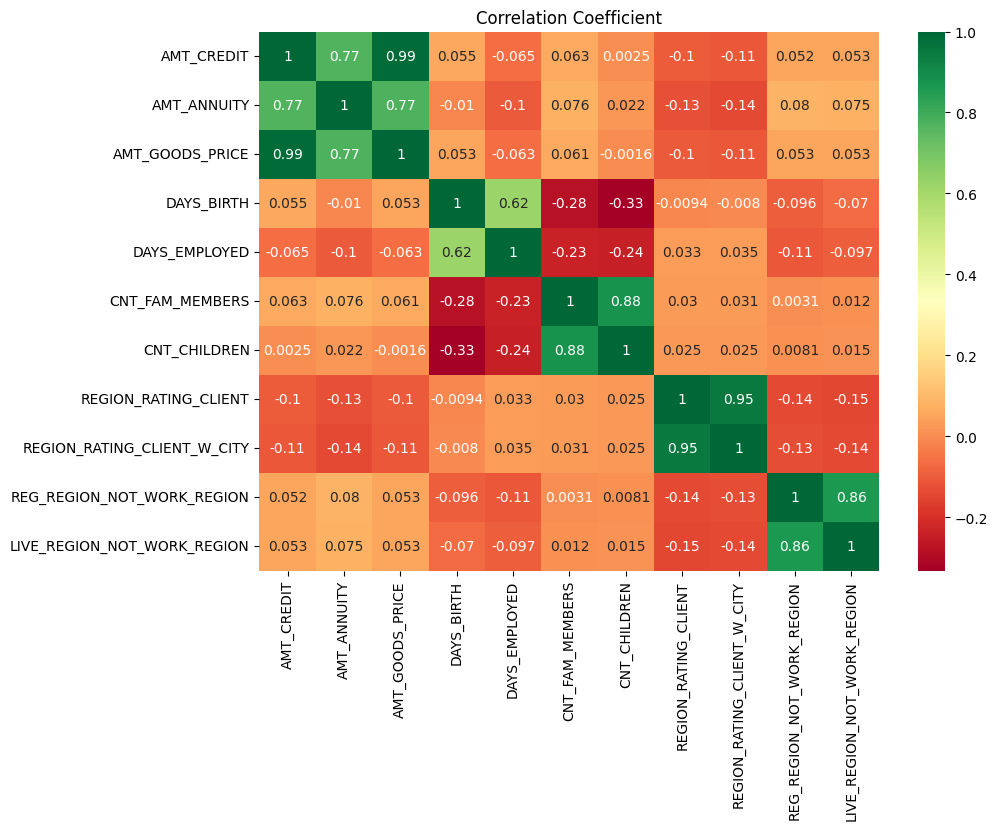

In [111]:
#plot the heatmap of correlation
num_corr = application[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
             'DAYS_BIRTH', 'DAYS_EMPLOYED',
             'CNT_FAM_MEMBERS','CNT_CHILDREN',
             'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
             'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']].corr()
plt.figure(figsize= (10,7))
sns.heatmap(num_corr, cmap="RdYlGn", annot=True)
plt.title('Correlation Coefficient')
plt.show()

Observations from the correlation table:
- **AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE** are high correlation together.
- **DAYS_BIRTH and DAYS_EMPLOYED** are high correlation.
- **CNT_FAM_MEMBERS and CNT_CHILDREN** are hight correlation.
- **REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY** are hight correlation.
- **REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION** are high correlation.

#### 6.2.2 Categorical Variables

In [118]:
application['TARGET'].mean()

0.08088857246431243

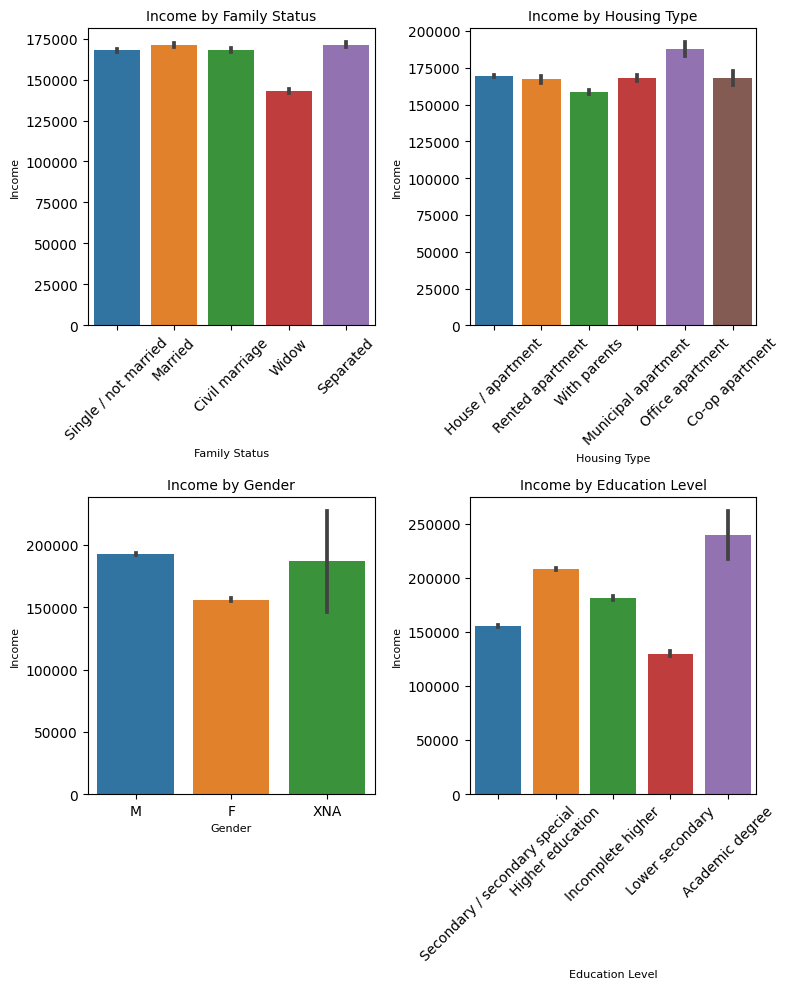

In [152]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))
sns.barplot(data= application, x= 'NAME_FAMILY_STATUS', y= 'AMT_INCOME_TOTAL', ax= axs[0,0])
axs[0,0].set_xlabel('Family Status', fontsize=8)
axs[0,0].set_ylabel('Income', fontsize=8)
axs[0,0].tick_params(axis='x', rotation=45)
axs[0,0].set_title('Income by Family Status', fontsize=10)

sns.barplot(data= application, x= 'NAME_HOUSING_TYPE', y= 'AMT_INCOME_TOTAL', ax= axs[0,1])
axs[0,1].set_xlabel('Housing Type', fontsize=8)
axs[0,1].set_ylabel('Income', fontsize=8)
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].set_title('Income by Housing Type', fontsize=10)

sns.barplot(data= application, x= 'CODE_GENDER', y= 'AMT_INCOME_TOTAL', ax= axs[1,0])
axs[1,0].set_xlabel('Gender', fontsize=8)
axs[1,0].set_ylabel('Income', fontsize=8)
axs[1,0].set_title('Income by Gender', fontsize=10)

sns.barplot(data= application, x= 'NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', ax= axs[1,1])
axs[1,1].set_xlabel('Education Level', fontsize=8)
axs[1,1].set_ylabel('Income', fontsize=8)
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].set_title('Income by Education Level', fontsize=10)

plt.tight_layout()
plt.show()


*The insights:*
- Family Status: Widows have the lowest income total, while other types are the same.
- Housing type: rented apartment and with parents who have low income. It proves that the financial ability of these clients isn't high, and that makes them have a high default risk.
- Gender: A male has a higher income than a female. Also, they have a higher default risk than women. It may be because females can manage their income better than males.
- Education level: A high education level can help people earn more money.

## 7. Conclusion and Suggestion

- Clients with low financial capacity are at high risk of default.
- Clients have many dependent persons are at high risk of default as they have more family expenses.
- Clients living in urban areas may have a high standard of living, but that doesn't mean they can afford the loans.
- More than 50% of clients who have been approved for previous applications still face payment difficulties. This is a risk to the bank.
- More than 80% of clients have rejected the previous application, but they can still be potential clients because they can pay on time. The bank can't miss these clients.
- The bank attracted more clients who were interested in cash loans, but they should check the application more carefully as it may contain more clients likely to default.